# **Importação e Visualização dos Dados**

## **Paleta de cores**

|Azul|||||
|------|------|------|------|------|
| AZUL1 |AZUL2 |AZUL3 |AZUL4 |AZUL5 |
|#03045e | #0077b6 | #00b4d8| #90e0ef | #CDDBF3 |
|![adicionar desc](https://github.com/alura-cursos/dataviz-graficos/blob/master/imagens/AZUL1.png?raw=true)|![adicionar desc](https://github.com/alura-cursos/dataviz-graficos/blob/master/imagens/AZUL2.png?raw=true)|![adicionar desc](https://github.com/alura-cursos/dataviz-graficos/blob/master/imagens/AZUL3.png?raw=true)|![adicionar desc](https://github.com/alura-cursos/dataviz-graficos/blob/master/imagens/AZUL4.png?raw=true)|![adicionar desc](https://github.com/alura-cursos/dataviz-graficos/blob/master/imagens/AZUL5.png?raw=true)|

&nbsp;

|Cinza|||||
|------|------|------|------|------|
| CINZA1 |CINZA2 |CINZA3 |CINZA4 |CINZA5|
|#212529 | #495057| #adb5bd | #dee2e6| #f8f9fa |
| ![adicionar desc](https://github.com/alura-cursos/dataviz-graficos/blob/master/imagens/CINZA1.png?raw=true)  |![adicionar desc](https://github.com/alura-cursos/dataviz-graficos/blob/master/imagens/CINZA2.png?raw=true) |![adicionar desc](https://github.com/alura-cursos/dataviz-graficos/blob/master/imagens/CINZA3.png?raw=true) |![adicionar desc](https://github.com/alura-cursos/dataviz-graficos/blob/master/imagens/CINZA4.png?raw=true) |![adicionar desc](https://github.com/alura-cursos/dataviz-graficos/blob/master/imagens/CINZA5.png?raw=true)|
&nbsp;

|Roxo|||||
|------|------|------|------|------|
| ROXO1 | ROXO2 | ROXO3| ROXO4 | ROXO5 |
|#ac58aa | #be7abb | #cf9bcc | #e0bcdd | #f0ddee |
| ![adicionar desc](https://github.com/Dyrlos/Paletas/blob/main/ROXO1.png?raw=true) |![adicionar desc](https://github.com/Dyrlos/Paletas/blob/main/ROXO2.png?raw=true)|![adicionar desc](https://github.com/Dyrlos/Paletas/blob/main/ROXO3.png?raw=true)| ![adicionar desc](https://github.com/Dyrlos/Paletas/blob/main/ROXO4.png?raw=true) | ![adicionar desc](https://github.com/Dyrlos/Paletas/blob/main/ROXO5.png?raw=true) |
&nbsp;

|Misto|||||||
|------|------|------|------|------|------|------|
| MARROM1 | VERMELHO1 |LARANJA1 |AMARELO1 | VERDE1 |VERDE2 | VERDE 3|
|#763f17|#e76f51 | #f4a261 | #e9c46a |#0C8040 | #4c956c |#2a9d8f| #d3ecd6|
|![adicionar desc](https://github.com/Dyrlos/Paletas/blob/main/MARROM1.png?raw=true)| ![adicionar desc](https://github.com/alura-cursos/dataviz-graficos/blob/master/imagens/VERMELHO1.png?raw=true) |![adicionar desc](https://github.com/alura-cursos/dataviz-graficos/blob/master/imagens/LARANJA1.png?raw=true)|![adicionar desc](https://github.com/alura-cursos/dataviz-graficos/blob/master/imagens/AMARELO1.png?raw=true)| ![adicionar desc](https://github.com/alura-cursos/dataviz-graficos/blob/master/imagens/VERDE1.png?raw=true) | ![adicionar desc](https://github.com/alura-cursos/dataviz-graficos/blob/master/imagens/VERDE2.png?raw=true) | ![adicionar desc](https://github.com/Dyrlos/Paletas/blob/main/VERDE3.png?raw=true) |




In [1]:
# @title
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
ROXO1,	ROXO2,	ROXO3,	ROXO4,	ROXO5, = '#ac58aa',	'#be7abb',	'#cf9bcc',	'#e0bcdd',	'#f0ddee'
MARROM1, VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2,VERDE3 = '#763f17', '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f', '#d3ecd6'

## **Função para colorir textos**

In [2]:
# @title
# Função para escrita de texto utilizando diferentes cores. Não existe uma
# função nativa para isso. (Adaptado de https://github.com/empathy87/storytelling-with-data)
from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

## **Importando bibliotecas**

In [3]:
# @title
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

## **Aumento da população**

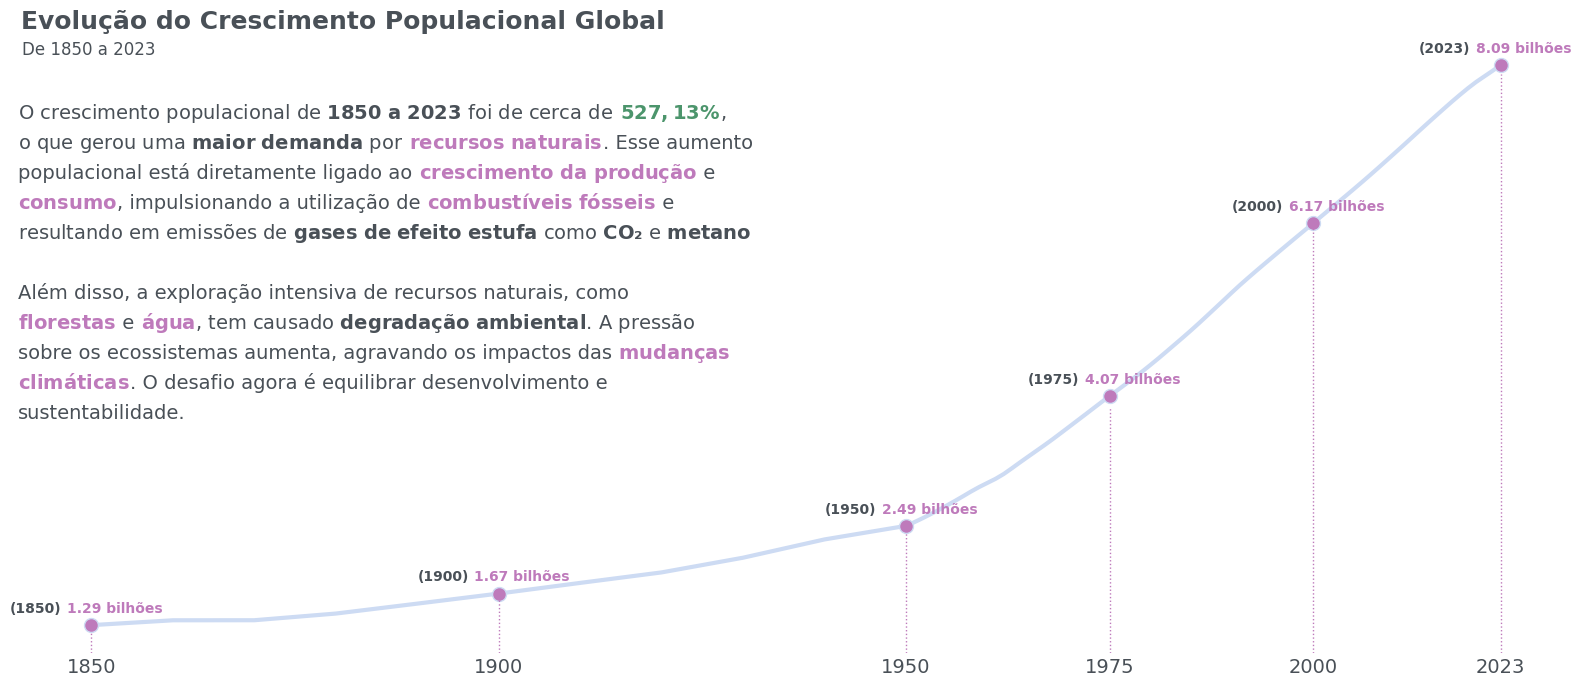

In [4]:
# @title
df_pop = pd.read_csv('/content/População 10000 A.C - 2024.csv')
df_pop = df_pop[df_pop['Year'] >= 1850]
df_pop.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots(figsize=(20, 8))

# Criando uma lista de booleanos para destacar os anos que são múltiplos de 25 ou o ano 2023
pontos_a_marcar = [(Ano % 25 == 0 or Ano == 2023) for Ano in df_pop['Year']]

# Plotando o gráfico de linha com pontos destacados
ax.plot(df_pop['Year'], df_pop['Population (historical)'], lw=3, color=AZUL5, marker='o',
        markersize=10, markerfacecolor=ROXO2, markevery=pontos_a_marcar)

# Configurações de título e rótulos
ax.set_title('Evolução do Crescimento Populacional Global', fontsize=18, color=CINZA2, loc='left', weight='bold')
ax.text(0.087, 0.98, 'De 1850 a 2023', transform=ax.transAxes, fontsize=12, color=CINZA2, ha='right', va='center')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.set_frame_on(False)
ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)

# Removendo todos os ticks do eixo x e y
ax.tick_params(axis='both', which='both', length=0)

# Adicionando os ticks no eixo X, incluindo os anos adicionais
anos_xticks = [1850, 1900, 1950, 1975, 2000, 2023]
ax.set_xticks(anos_xticks)

# Adicionando as anotações para os pontos a cada 25 anos e para 2023
for i, (year, population) in enumerate(zip(df_pop['Year'], df_pop['Population (historical)'])):
    if year % 25 == 0 or year == 2023:
      population_bilhao = population / 1e9
      ax.text(x=year-3,          # Ajuste horizontal
              y=population + 1.5e8,  # Ajuste vertical para evitar sobreposição
              s=f"{population_bilhao:.2f} bilhões",
              color=ROXO2, weight="bold", fontsize=10)
      ax.text(x=year - 10,       # Ajuste horizontal
              y=population + 1.5e8,  # Ajuste vertical para evitar sobreposição
              s=f"({year})",
              color=CINZA2, weight="bold", fontsize=10)

texto_colorido(
    1841,3.8e9,
    'O crescimento populacional de $\\bf{1850\ a\ 2023}$ foi de cerca de || $\\bf{527,13\%}$||,\n'
    'o que gerou uma $\\bf{maior\ demanda}$ por || $\\bf{recursos\ naturais}$||. Esse aumento\n'
    'populacional está diretamente ligado ao ||$\\bf{crescimento\ da\ produção}$|| e\n'
    '$\\bf{consumo}$||, impulsionando a utilização de ||$\\bf{combustíveis\ fósseis}$|| e\n'
    'resultando em emissões de $\\bf{gases\ de\ efeito\ estufa}$ como $\\bf{CO₂}$ e $\\bf{metano}$\n'
    '\n'
    'Além disso, a exploração intensiva de recursos naturais, como\n'
    '$\\bf{florestas}$|| e ||$\\bf{água}$||, tem causado $\\bf{degradação\ ambiental}$. A pressão\n'
    'sobre os ecossistemas aumenta, agravando os impactos das ||$\\bf{mudanças}$\n'
    '$\\bf{climáticas}$||. O desafio agora é equilibrar desenvolvimento e\n'
    'sustentabilidade.',
    [
        [CINZA2, VERDE1, CINZA2],
        [CINZA2, ROXO2, CINZA2],
        [CINZA2, ROXO2, CINZA2],
        [ROXO2, CINZA2, ROXO2, CINZA2],
        [CINZA2],
        [CINZA2],
        [CINZA2],
        [ROXO2, CINZA2, ROXO2, CINZA2],
        [CINZA2, ROXO2],
        [ROXO2, CINZA2],
        [CINZA2]
    ],
    esp=30,
    ax=ax,
    fontsize=14
)

#Adicionando linha nos anos
ax.axvline(x= 1.85e3, ymin= 0, ymax= 0.035, color=ROXO2, linewidth=1, linestyle=':')
ax.axvline(x= 1.9e3, ymin= 0, ymax= 0.1, color=ROXO2, linewidth=1, linestyle=':')
ax.axvline(x= 1.95e3, ymin= 0, ymax= 0.20, color=ROXO2, linewidth=1, linestyle=':')
ax.axvline(x= 1.975e3, ymin= 0, ymax= 0.4, color=ROXO2, linewidth=1, linestyle=':')
ax.axvline(x= 2e3, ymin= 0, ymax= 0.69, color=ROXO2, linewidth=1, linestyle=':')
ax.axvline(x= 2.023e3, ymin= 0, ymax= 0.94, color=ROXO2, linewidth=1, linestyle=':')


plt.show()

## **Emissões de Co2**

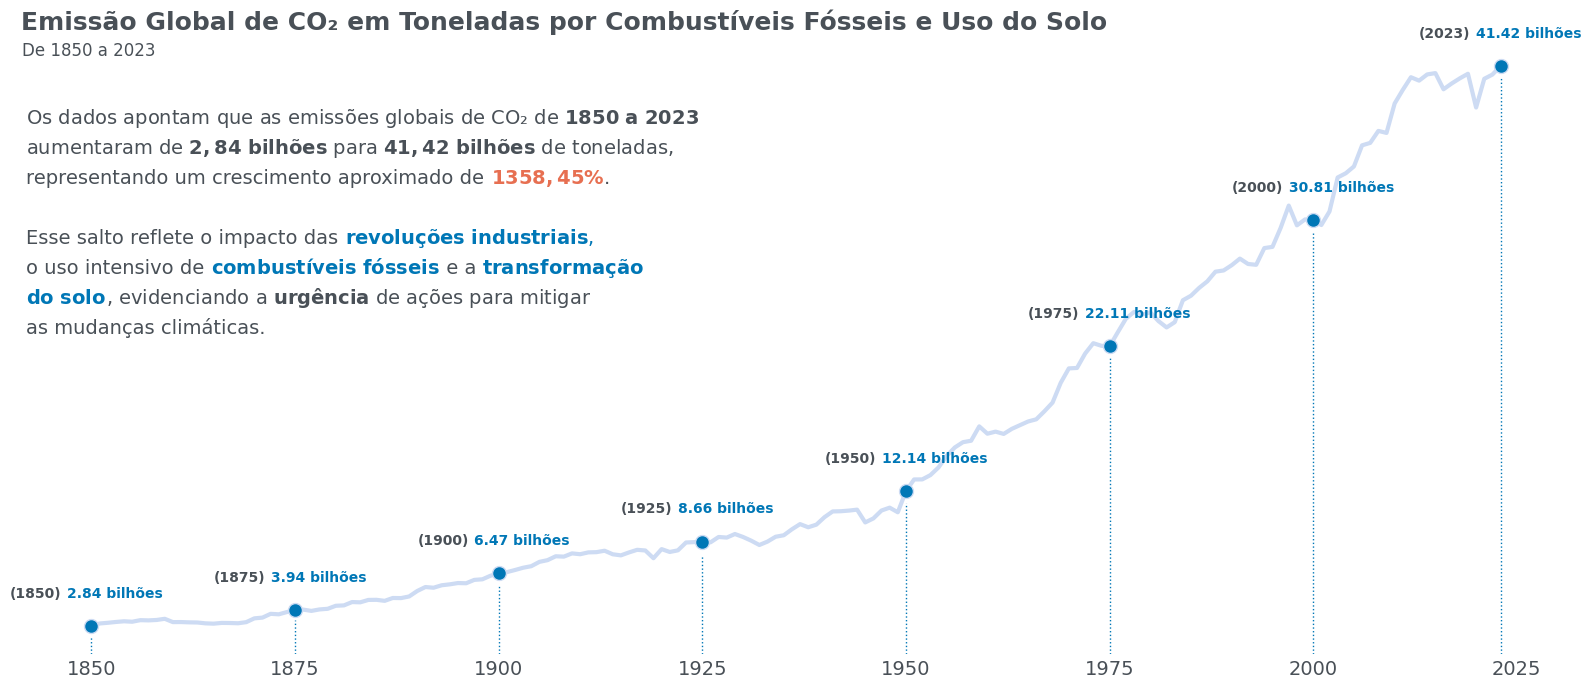

In [5]:
# @title
df_co2 = pd.read_csv('/content/Emissões Anuais Globais Co2 Fossil+Uso do Solo 1850-2023.csv') #Importando arquivo para variável
df_co2.rename(columns={'Annual CO₂ emissions including land-use change': 'Emissions'}, inplace=True) #Renomeando coluna para facilitar a utilização

fig, ax = plt.subplots(figsize=(20, 8))

# Criando uma lista de booleanos para destacar os anos que são múltiplos de 25 ou o ano 2023
pontos_a_marcar = [(Ano % 25 == 0 or Ano == 2023) for Ano in df_co2['Year']]

# Plotando o gráfico de linha com pontos destacados
ax.plot(df_co2['Year'], df_co2['Emissions'], lw=3, color=AZUL5, marker='o',
        markersize=10, markerfacecolor=AZUL2, markevery=pontos_a_marcar)

# Configurações de título e rótulos
ax.set_title('Emissão Global de CO₂ em Toneladas por Combustíveis Fósseis e Uso do Solo', fontsize=18, color=CINZA2, loc='left', weight='bold')
ax.text(0.087, 0.98, 'De 1850 a 2023', transform=ax.transAxes, fontsize=12, color=CINZA2, ha='right', va='center')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.set_frame_on(False)
ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)

# Removendo todos os ticks do eixo x e y
ax.tick_params(axis='both', which='both', length=0)

# Adicionando as anotações para os pontos a cada 25 anos e para 2023
for i, (year, emission) in enumerate(zip(df_co2['Year'], df_co2['Emissions'])):
    if year % 25 == 0 or year == 2023:
      emission_bilhao = emission / 1e9
      ax.text(x=year-3,          # Ajuste horizontal
              y=emission + 2e9,  # Ajuste vertical para evitar sobreposição
              s=f"{emission_bilhao:.2f} bilhões",
              color=AZUL2, weight="bold", fontsize=10)
      ax.text(x=year - 10,       # Ajuste horizontal
              y=emission + 2e9,  # Ajuste vertical para evitar sobreposição
              s=f"({year})",
              color=CINZA2, weight="bold", fontsize=10)


# Adicionando texto colorido
texto_colorido(
    1842,2.3e10,                         # coordenadas
    'Os dados apontam que as emissões globais de CO₂ de $\\bf{1850\ a\ 2023}$\n'          # Linha 1
    'aumentaram de $\\bf{2,84\ bilhões}$ para $\\bf{41,42\ bilhões}$ de toneladas,\n'     # Linha 2
    'representando um crescimento aproximado de ||$\\bf{1358,45\%}$||.\n'                 # Linha 3
    '\n'                                                                                  # Linha 4
    'Esse salto reflete o impacto das ||$\\bf{revoluções\ industriais}$,\n'               # Linha 5
    'o uso intensivo de ||$\\bf{combustíveis\ fósseis}$|| e a ||$\\bf{transformação}$\n'  # Linha 6
    '$\\bf{do\ solo}$||, evidenciando a $\\bf{urgência}$ de ações para mitigar\n'         # Linha 7
    'as mudanças climáticas.',                                                            # Linha 8
    [
        [CINZA2],                         # Linha 1
        [CINZA2],                         # Linha 2
        [CINZA2, VERMELHO1, CINZA2],      # Linha 3
        [CINZA2],                         # Linha 4
        [CINZA2, AZUL2],                  # Linha 5
        [CINZA2, AZUL2, CINZA2, AZUL2],   # Linha 6
        [AZUL2, CINZA2],                  # Linha 7
        [CINZA2]                          # Linha 8
    ],
    esp=30,
    ax=ax,
    fontsize=14
)

#Adicionando linha nos anos
ax.axvline(x= 1.85e3, ymin= 0, ymax= 0.03, color=AZUL2, linewidth=1, linestyle=':')
ax.axvline(x= 1.875e3, ymin= 0, ymax= 0.055, color=AZUL2, linewidth=1, linestyle=':')
ax.axvline(x= 1.9e3, ymin= 0, ymax= 0.113, color=AZUL2, linewidth=1, linestyle=':')
ax.axvline(x= 1.925e3, ymin= 0, ymax= 0.16, color=AZUL2, linewidth=1, linestyle=':')
ax.axvline(x= 1.95e3, ymin= 0, ymax= 0.245, color=AZUL2, linewidth=1, linestyle=':')
ax.axvline(x= 1.975e3, ymin= 0, ymax= 0.48, color=AZUL2, linewidth=1, linestyle=':')
ax.axvline(x= 2e3, ymin= 0, ymax= 0.685, color=AZUL2, linewidth=1, linestyle=':')
ax.axvline(x= 2.023e3, ymin= 0, ymax= 0.935, color=AZUL2, linewidth=1, linestyle=':')

plt.show()

## **Emissões de Gás Metano**

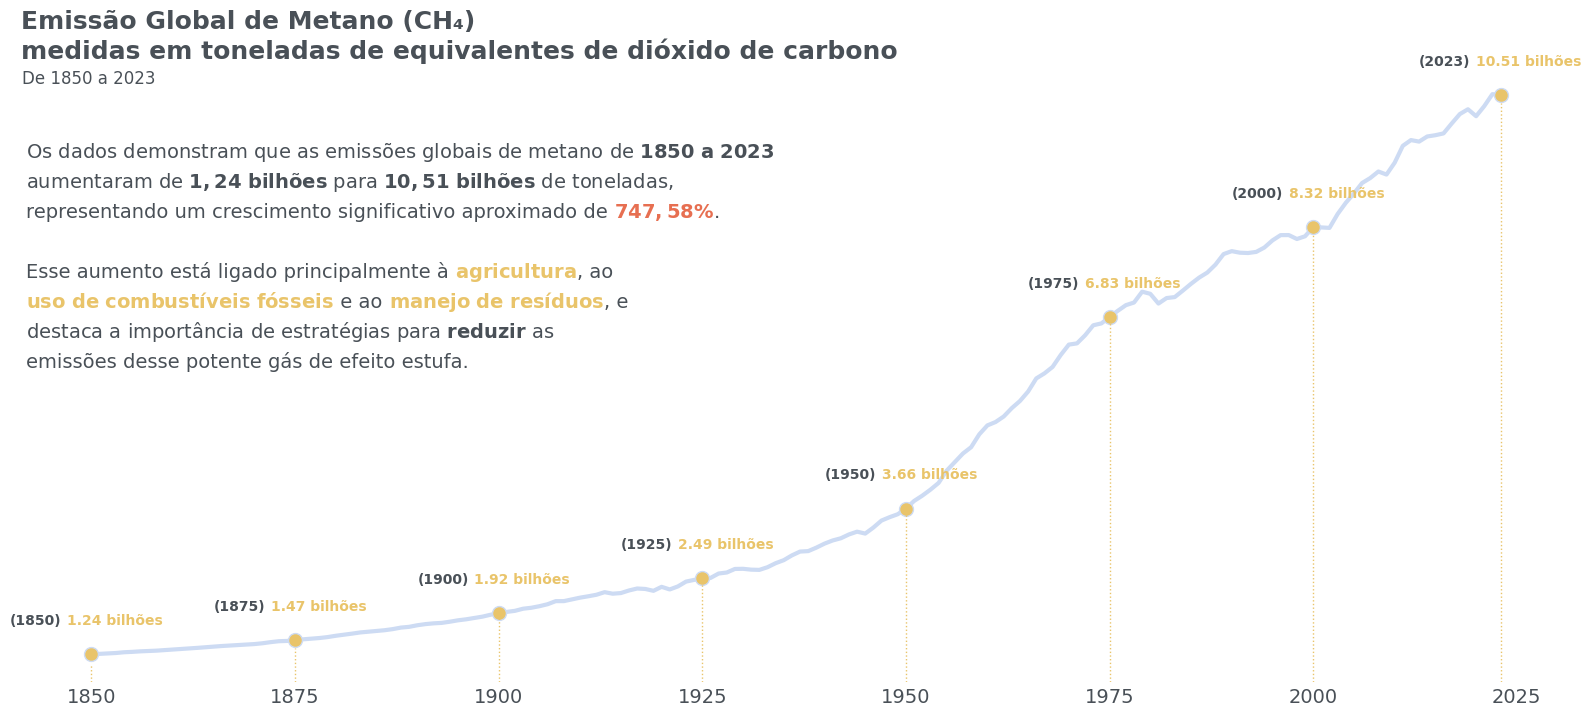

In [6]:
# @title
df_ch4 = pd.read_csv('/content/Emissões Anuais Globais de Metano 1850-2023.csv')
df_ch4.rename(columns={'Annual methane emissions in CO₂ equivalents': 'Emissions'}, inplace=True)

fig, ax = plt.subplots(figsize=(20, 8))

# Criando uma lista de booleanos para destacar os anos que são múltiplos de 25 ou o ano 2023
pontos_a_marcar = [(Ano % 25 == 0 or Ano == 2023) for Ano in df_ch4['Year']]

# Plotando o gráfico de linha com pontos destacados
ax.plot(df_ch4['Year'], df_ch4['Emissions'], lw=3, color=AZUL5, marker='o',
        markersize=10, markerfacecolor=AMARELO1, markevery=pontos_a_marcar)

# Configurações de título e rótulos
ax.set_title('Emissão Global de Metano (CH₄)\nmedidas em toneladas de equivalentes de dióxido de carbono', fontsize=18, color=CINZA2, loc='left', weight='bold')
ax.text(0.087, 0.98, 'De 1850 a 2023', transform=ax.transAxes, fontsize=12, color=CINZA2, ha='right', va='center')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.set_frame_on(False)
ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)

# Removendo todos os ticks do eixo x e y
ax.tick_params(axis='both', which='both', length=0)

# Adicionando as anotações para os pontos a cada 25 anos e para 2023
for i, (year, emission) in enumerate(zip(df_ch4['Year'], df_ch4['Emissions'])):
    if year % 25 == 0 or year == 2023:
      emission_bilhao = emission / 1e9
      ax.text(x=year-3,          # Ajuste horizontal
              y=emission + 5e8,  # Ajuste vertical para evitar sobreposição
              s=f"{emission_bilhao:.2f} bilhões",
              color=AMARELO1, weight="bold", fontsize=10)
      ax.text(x=year - 10,       # Ajuste horizontal
              y=emission + 5e8,  # Ajuste vertical para evitar sobreposição
              s=f"({year})",
              color=CINZA2, weight="bold", fontsize=10)


texto_colorido(
    1842,6e9,
    'Os dados demonstram que as emissões globais de metano de $\\bf{1850\ a\ 2023}$\n'
    'aumentaram de $\\bf{1,24\ bilhões}$ para $\\bf{10,51\ bilhões}$ de toneladas,\n'
    'representando um crescimento significativo aproximado de|| $\\bf{747,58\%}$||.\n'
    '\n'
    'Esse aumento está ligado principalmente à ||$\\bf{agricultura}$||, ao\n'
    '$\\bf{uso\ de\ combustíveis\ fósseis}$|| e ao ||$\\bf{manejo\ de\ resíduos}$||, e\n'
    'destaca a importância de estratégias para $\\bf{reduzir}$ as\n'
    'emissões desse potente gás de efeito estufa.',
    [
        [CINZA2],
        [CINZA2],
        [CINZA2, VERMELHO1, CINZA2],
        [CINZA2],
        [CINZA2, AMARELO1, CINZA2],
        [AMARELO1, CINZA2, AMARELO1, CINZA2],
        [CINZA2],
        [CINZA2]
    ],
    esp=30,
    ax=ax,
    fontsize=14

)

#Adicionando linha nos anos
ax.axvline(x= 1.85e3, ymin= 0, ymax= 0.03, color=AMARELO1, linewidth=1, linestyle=':')
ax.axvline(x= 1.875e3, ymin= 0, ymax= 0.055, color=AMARELO1, linewidth=1, linestyle=':')
ax.axvline(x= 1.9e3, ymin= 0, ymax= 0.113, color=AMARELO1, linewidth=1, linestyle=':')
ax.axvline(x= 1.925e3, ymin= 0, ymax= 0.16, color=AMARELO1, linewidth=1, linestyle=':')
ax.axvline(x= 1.95e3, ymin= 0, ymax= 0.28, color=AMARELO1, linewidth=1, linestyle=':')
ax.axvline(x= 1.975e3, ymin= 0, ymax= 0.6, color=AMARELO1, linewidth=1, linestyle=':')
ax.axvline(x= 2e3, ymin= 0, ymax= 0.74, color=AMARELO1, linewidth=1, linestyle=':')
ax.axvline(x= 2.023e3, ymin= 0, ymax= 0.94, color=AMARELO1, linewidth=1, linestyle=':')


plt.show()

## **Emissões de Óxido Nitroso**

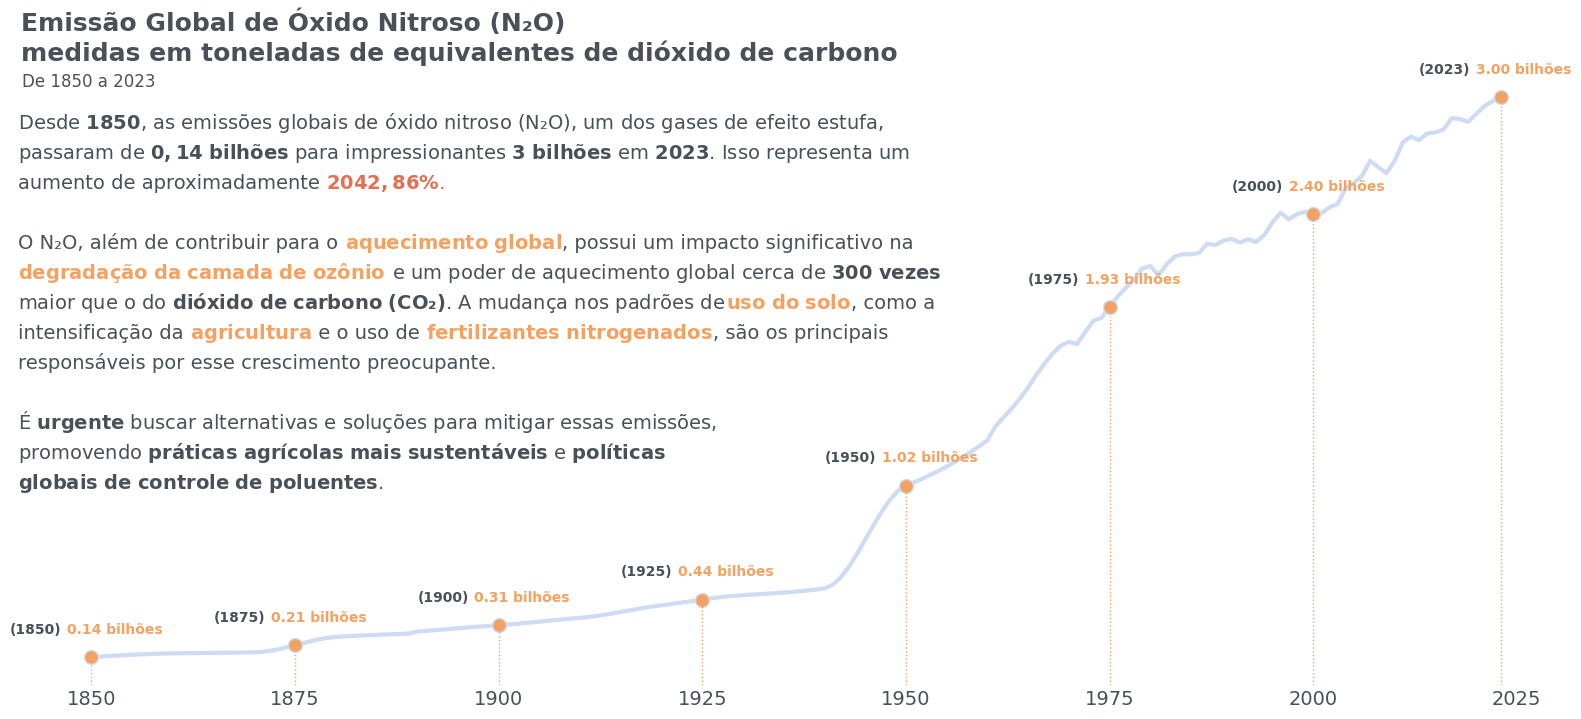

In [7]:
# @title
df_nox = pd.read_csv('/content/Emissões Anuais Globais de Óxido Nitroso 1850-2023.csv')
df_nox.rename(columns={'Annual nitrous oxide emissions in CO₂ equivalents': 'Emissions'}, inplace=True)

fig, ax = plt.subplots(figsize=(20, 8))

# Criando uma lista de booleanos para destacar os anos que são múltiplos de 25 ou o ano 2023
pontos_a_marcar = [(Ano % 25 == 0 or Ano == 2023) for Ano in df_nox['Year']]

# Plotando o gráfico de linha com pontos destacados
ax.plot(df_nox['Year'], df_nox['Emissions'], lw=3, color=AZUL5, marker='o',
        markersize=10, markerfacecolor=LARANJA1, markevery=pontos_a_marcar)

# Configurações de título e rótulos
ax.set_title('Emissão Global de Óxido Nitroso (N₂O)\nmedidas em toneladas de equivalentes de dióxido de carbono', fontsize=18, color=CINZA2, loc='left', weight='bold')
ax.text(0.087, 0.98, 'De 1850 a 2023', transform=ax.transAxes, fontsize=12, color=CINZA2, ha='right', va='center')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.set_frame_on(False)
ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)

# Removendo todos os ticks do eixo x e y
ax.tick_params(axis='both', which='both', length=0)

# Adicionando as anotações para os pontos a cada 25 anos e para 2023
for i, (year, emission) in enumerate(zip(df_nox['Year'], df_nox['Emissions'])):
    if year % 25 == 0 or year == 2023:
      emission_bilhao = emission / 1e9
      ax.text(x=year-3,          # Ajuste horizontal
              y=emission + 1.2e8,  # Ajuste vertical para evitar sobreposição
              s=f"{emission_bilhao:.2f} bilhões",
              color=LARANJA1, weight="bold", fontsize=10)
      ax.text(x=year - 10,       # Ajuste horizontal
              y=emission + 1.2e8,  # Ajuste vertical para evitar sobreposição
              s=f"({year})",
              color=CINZA2, weight="bold", fontsize=10)


texto_colorido(
    1841,1e9,
    'Desde $\\bf{1850}$, as emissões globais de óxido nitroso (N₂O), um dos gases de efeito estufa,\n'                      # Linha 1
    'passaram de $\\bf{0,14\ bilhões}$ para impressionantes $\\bf{3\ bilhões}$ em $\\bf{2023}$. Isso representa um\n'       # Linha 2
    'aumento de aproximadamente ||$\\bf{2042,86\%}$.\n'                                                                     # Linha 3
    '\n'                                                                                                                    # Linha 4
    'O N₂O, além de contribuir para o ||$\\bf{aquecimento\ global}$||, possui um impacto significativo na\n'                # Linha 5
    '$\\bf{degradação\ da\ camada\ de\ ozônio}$ || e um poder de aquecimento global cerca de $\\bf{300\ vezes}$ \n'         # Linha 6
    'maior que o do $\\bf{dióxido\ de\ carbono\ (CO₂)}$. A mudança nos padrões de ||$\\bf{uso\ do\ solo}$||, como a\n'      # Linha 7
    'intensificação da ||$\\bf{agricultura}$|| e o uso de ||$\\bf{fertilizantes\ nitrogenados}$||, são os principais\n'     # Linha 8
    'responsáveis por esse crescimento preocupante.\n'                                                                      # Linha 9
    '\n'                                                                                                                    # Linha 10
    'É $\\bf{urgente}$ buscar alternativas e soluções para mitigar essas emissões,\n'                                       # Linha 11
    'promovendo $\\bf{práticas\ agrícolas\ mais\ sustentáveis}$ e $\\bf{políticas}$  \n'                                    # Linha 12
    '$\\bf{globais\ de\ controle\ de\ poluentes}$.',                                                                        # Linha 13
    [
        [CINZA2],
        [CINZA2],
        [CINZA2, VERMELHO1],
        [CINZA2],
        [CINZA2, LARANJA1, CINZA2],
        [LARANJA1, CINZA2],
        [CINZA2, LARANJA1, CINZA2],
        [CINZA2, LARANJA1, CINZA2, LARANJA1, CINZA2],
        [CINZA2],
        [CINZA2],
        [CINZA2],
        [CINZA2],
        [CINZA2]
    ],
    esp=30,
    ax=ax,
    fontsize=14
)

#Adicionando linha nos anos
ax.axvline(x= 1.85e3, ymin= 0, ymax= 0.035, color=LARANJA1, linewidth=1, linestyle=':')
ax.axvline(x= 1.875e3, ymin= 0, ymax= 0.05, color=LARANJA1, linewidth=1, linestyle=':')
ax.axvline(x= 1.9e3, ymin= 0, ymax= 0.1, color=LARANJA1, linewidth=1, linestyle=':')
ax.axvline(x= 1.925e3, ymin= 0, ymax= 0.13, color=LARANJA1, linewidth=1, linestyle=':')
ax.axvline(x= 1.95e3, ymin= 0, ymax= 0.32, color=LARANJA1, linewidth=1, linestyle=':')
ax.axvline(x= 1.975e3, ymin= 0, ymax= 0.6, color=LARANJA1, linewidth=1, linestyle=':')
ax.axvline(x= 2e3, ymin= 0, ymax= 0.76, color=LARANJA1, linewidth=1, linestyle=':')
ax.axvline(x= 2.023e3, ymin= 0, ymax= 0.94, color=LARANJA1, linewidth=1, linestyle=':')


plt.show()

## **Aumento da Temperatura**

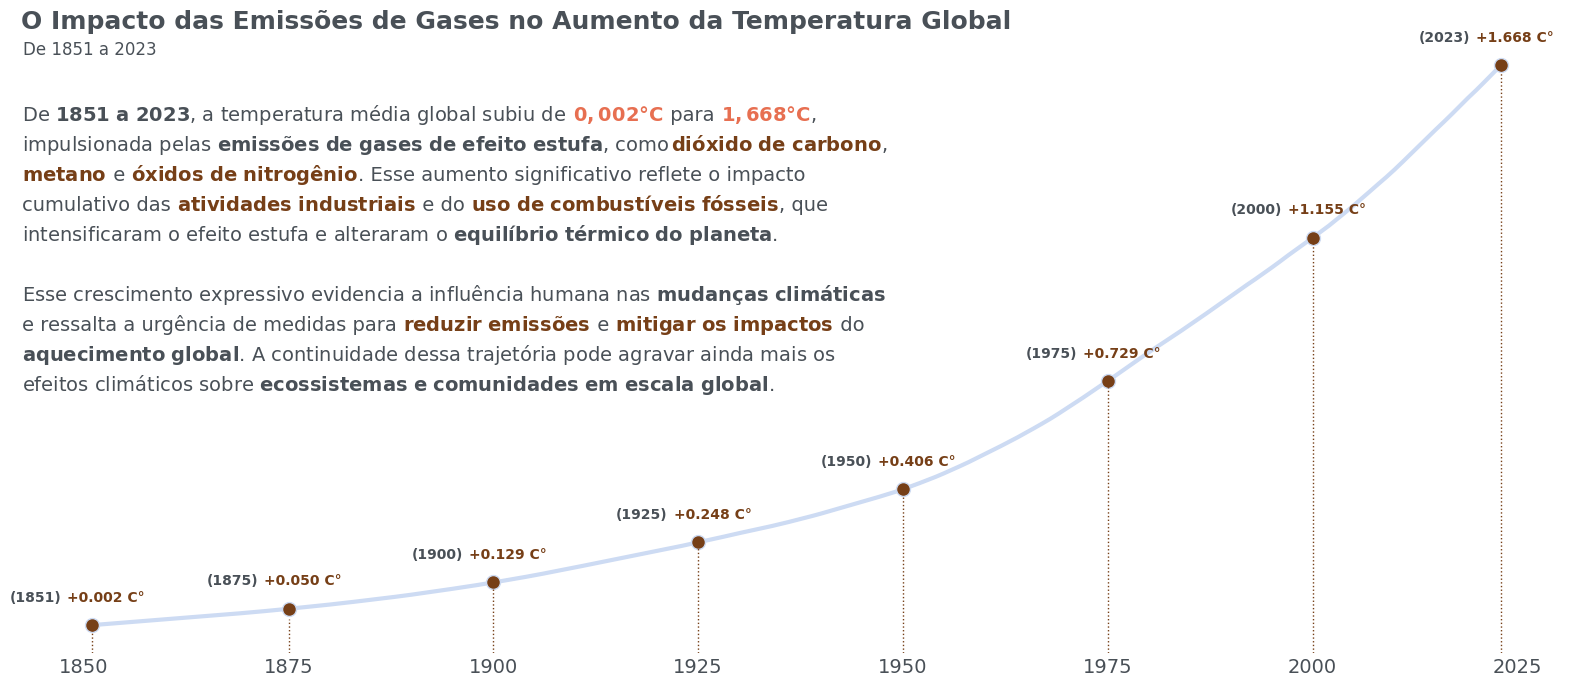

In [8]:
# @title
df_temp = pd.read_csv('/content/Aumento da temperatura global 1851-2023.csv')
df_temp.rename(columns={'Change in global mean surface temperature caused by greenhouse gas emissions': 'Change'}, inplace=True)

fig, ax = plt.subplots(figsize=(20, 8))

# Criando uma lista de booleanos para destacar os anos que são múltiplos de 25 ou o ano 2023
pontos_a_marcar = [(Ano % 25 == 0 or Ano == 2023 or Ano == 1851) for Ano in df_temp['Year']]

# Plotando o gráfico de linha com pontos destacados
ax.plot(df_temp['Year'], df_temp['Change'], lw=3, color=AZUL5, marker='o',
        markersize=10, markerfacecolor=MARROM1, markevery=pontos_a_marcar)

# Configurações de título e rótulos
ax.set_title('O Impacto das Emissões de Gases no Aumento da Temperatura Global', fontsize=18, color=CINZA2, loc='left', weight='bold')
ax.text(0.087, 0.98, 'De 1851 a 2023', transform=ax.transAxes, fontsize=12, color=CINZA2, ha='right', va='center')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.set_frame_on(False)
ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)

# Removendo todos os ticks do eixo x e y
ax.tick_params(axis='both', which='both', length=0)

# Adicionando as anotações para os pontos a cada 25 anos e para 2023
for i, (year, change) in enumerate(zip(df_temp['Year'], df_temp['Change'])):
    if year % 25 == 0 or year == 2023 or year == 1851:
      ax.text(x=year-3,          # Ajuste horizontal
              y=change + 0.07,  # Ajuste vertical para evitar sobreposição
              s=f"+{change:.3f} C°",
              color=MARROM1, weight="bold", fontsize=10)
      ax.text(x=year - 10,       # Ajuste horizontal
              y=change + 0.07,  # Ajuste vertical para evitar sobreposição
              s=f"({year})",
              color=CINZA2, weight="bold", fontsize=10)

texto_colorido(
    1842.5, 0.7,
    'De $\\bf{1851\ a\ 2023}$, a temperatura média global subiu de || $\\bf{0,002°C}$|| para ||$\\bf{1,668°C}$||,\n'
    'impulsionada pelas $\\bf{emissões\ de\ gases\ de\ efeito\ estufa}$, como ||$\\bf{dióxido\ de\ carbono}$||,\n'
    '$\\bf{metano}$|| e|| $\\bf{óxidos\ de\ nitrogênio}$||. Esse aumento significativo reflete o impacto\n'
    'cumulativo das ||$\\bf{atividades\ industriais}$|| e do ||$\\bf{uso\ de\ combustíveis\ fósseis}$||, que\n'
    'intensificaram o efeito estufa e alteraram o $\\bf{equilíbrio\ térmico\ do\ planeta}$.\n'
    '\n'
    'Esse crescimento expressivo evidencia a influência humana nas $\\bf{mudanças\ climáticas}$\n'
    'e ressalta a urgência de medidas para ||$\\bf{reduzir\ emissões}$|| e ||$\\bf{mitigar\ os\ impactos}$|| do\n'
    '$\\bf{aquecimento\ global}$. A continuidade dessa trajetória pode agravar ainda mais os\n'
    'efeitos climáticos sobre $\\bf{ecossistemas\ e\ comunidades\ em\ escala\ global}$.',
    [
        [CINZA2, VERMELHO1, CINZA2, VERMELHO1, CINZA2],
        [CINZA2, MARROM1, CINZA2],
        [MARROM1, CINZA2, MARROM1, CINZA2],
        [CINZA2, MARROM1, CINZA2, MARROM1, CINZA2],
        [CINZA2],
        [CINZA2],
        [CINZA2],
        [CINZA2, MARROM1, CINZA2, MARROM1, CINZA2],
        [CINZA2],
        [CINZA2],
    ],
    esp=30,
    ax=ax,
    fontsize=14
)

#Adicionando linha nos anos
ax.axvline(x= 1.851e3, ymin= 0, ymax= 0.04, color=MARROM1, linewidth=1, linestyle=':')
ax.axvline(x= 1.875e3, ymin= 0, ymax= 0.055, color=MARROM1, linewidth=1, linestyle=':')
ax.axvline(x= 1.9e3, ymin= 0, ymax= 0.113, color=MARROM1, linewidth=1, linestyle=':')
ax.axvline(x= 1.925e3, ymin= 0, ymax= 0.19, color=MARROM1, linewidth=1, linestyle=':')
ax.axvline(x= 1.95e3, ymin= 0, ymax= 0.27, color=MARROM1, linewidth=1, linestyle=':')
ax.axvline(x= 1.975e3, ymin= 0, ymax= 0.45, color=MARROM1, linewidth=1, linestyle=':')
ax.axvline(x= 2e3, ymin= 0, ymax= 0.68, color=MARROM1, linewidth=1, linestyle=':')
ax.axvline(x= 2.023e3, ymin= 0, ymax= 0.945, color=MARROM1, linewidth=1, linestyle=':')


plt.show()

# **Juntando dados em um unico data frame**

In [9]:
# @title
from functools import reduce

df_ch4 = df_ch4.rename(columns={"Emissions": "CH4 Emissions"})
df_co2 = df_co2.rename(columns={"Emissions": "CO2 Emissions"})
df_nox = df_nox.rename(columns={"Emissions": "N2O Emissions"})

df_pop.drop(columns=['Entity'], inplace=True)
df_temp.drop(columns=['Entity'], inplace=True)
df_ch4.drop(columns=['Entity'], inplace=True)
df_co2.drop(columns=['Entity'], inplace=True)

# Lista de dataframes
dataframes = [df_ch4, df_co2, df_nox, df_pop, df_temp]

# Juntando os dataframes com base na coluna "Year"
df_aglutinado = reduce(lambda left, right: pd.merge(left, right, on="Year"), dataframes)

df_aglutinado.drop(columns=['Entity', 'Code'], inplace=True)
df_aglutinado.rename(columns={'Population (historical)': 'Population'}, inplace=True)
df_aglutinado.head()

,Year,CH4 Emissions,CO2 Emissions,N2O Emissions,Population,Change
0,1860,1317394000,3113146400,164125010,1346093952,0.019506
1,1870,1406287900,3371271700,169402670,1346763136,0.039016
2,1880,1544154800,4238370600,247686800,1427718912,0.063049
3,1890,1718403000,5256924000,275116800,1548405760,0.092484
4,1900,1919433600,6467588000,307407400,1670635648,0.128994


# **Mapa de calor de correlação entre variáveis**

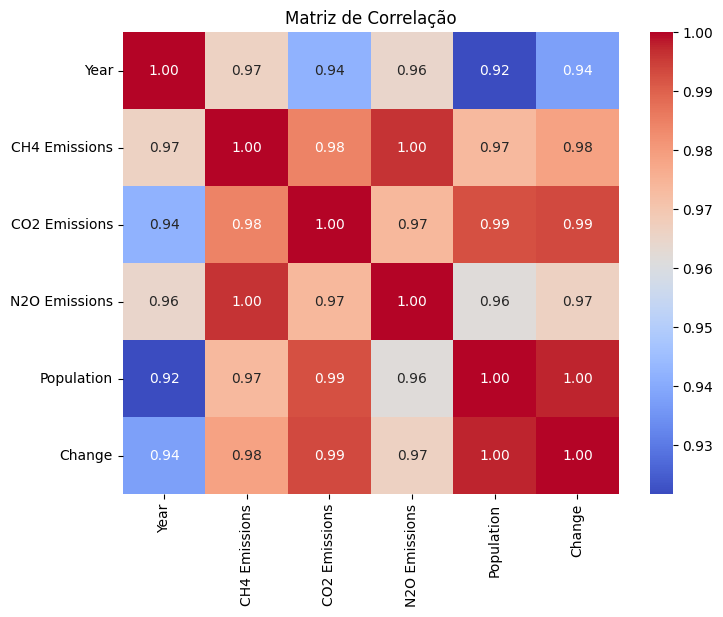

In [10]:
# @title
corr = df_aglutinado.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Matriz de Correlação")
plt.show()

# **Prevendo valores com Regrassão Linear usando a biblioteca Sklearn**


---



### **Importando bibliotecas**

In [11]:
# @title
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## **Prevendo tendência de valores de população com Regressão Linear**


---



### **Criando, treinando e testando o modelo**

Erro Quadrático Médio (MSE): 12614630955215534.00
Coeficiente de Determinação (R²): 1.00



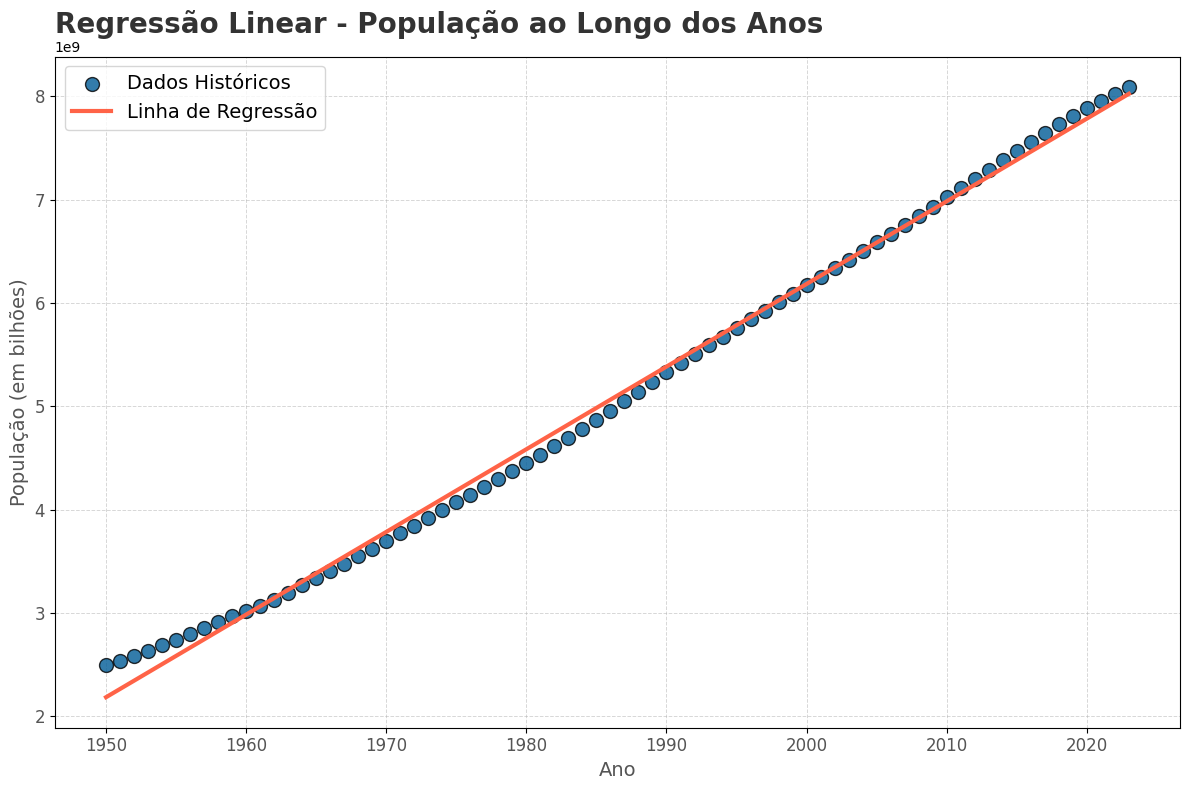

In [12]:
# @title
df_1950 = df_aglutinado[df_aglutinado['Year'] >= 1950]  # Pegando dados populacionais a partir de 1950 para melhor análise de tendencia atual


X_pop = df_1950[['Year']] # Definindo X
y_pop = df_1950['Population'] # Definindo Y

X_train_pop, X_test_pop, y_train_pop, y_test_pop = train_test_split(X_pop, y_pop, test_size=0.25, random_state=37) # Dividindo treino e teste

model_pop = LinearRegression() # Criando modelo
model_pop.fit(X_train_pop, y_train_pop) # Treinando modelo

y_pred_pop = model_pop.predict(X_test_pop) # Fazendo previsões com o modelo

mse = mean_squared_error(y_test_pop, y_pred_pop) # Definindo erro quadrático médio (MSE)
r2 = r2_score(y_test_pop, y_pred_pop) # Definindo o coeficiente de determinação (R²)

print(f'Erro Quadrático Médio (MSE): {mse:.2f}') # Verificando erro quadrático médio (MSE)
print(f'Coeficiente de Determinação (R²): {r2:.2f}\n') # Verificando o coeficiente de determinação (R²)


# Criando o gráfico
plt.figure(figsize=(12, 8))
plt.scatter(X_pop, y_pop, color='#005B96', s=100, label='Dados Históricos', zorder=5, edgecolors='black', alpha=0.8)  # Pontos com borda preta e alpha
plt.plot(X_pop, model_pop.predict(X_pop), color='#FF6347', lw=3, label='Linha de Regressão', linestyle='-', zorder=10)  # Linha de regressão vermelha

# Ajustes de título, rótulos e legenda
plt.title('Regressão Linear - População ao Longo dos Anos', fontsize=20, color='#333333', weight='bold', loc='left')
plt.xlabel('Ano', fontsize=14, color='#555555')
plt.ylabel('População (em bilhões)', fontsize=14, color='#555555')

# Personalizando as fontes e estilo dos rótulos
plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')

# Melhorando a legenda
plt.legend(loc='upper left', fontsize=14, fancybox=True, framealpha=0.8)

# Adicionando uma grade suave
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.5)

# Ajuste final de margens
plt.tight_layout()

# Exibindo o gráfico
plt.show()

## **Aplicando modelo para prever valores ate 2150**

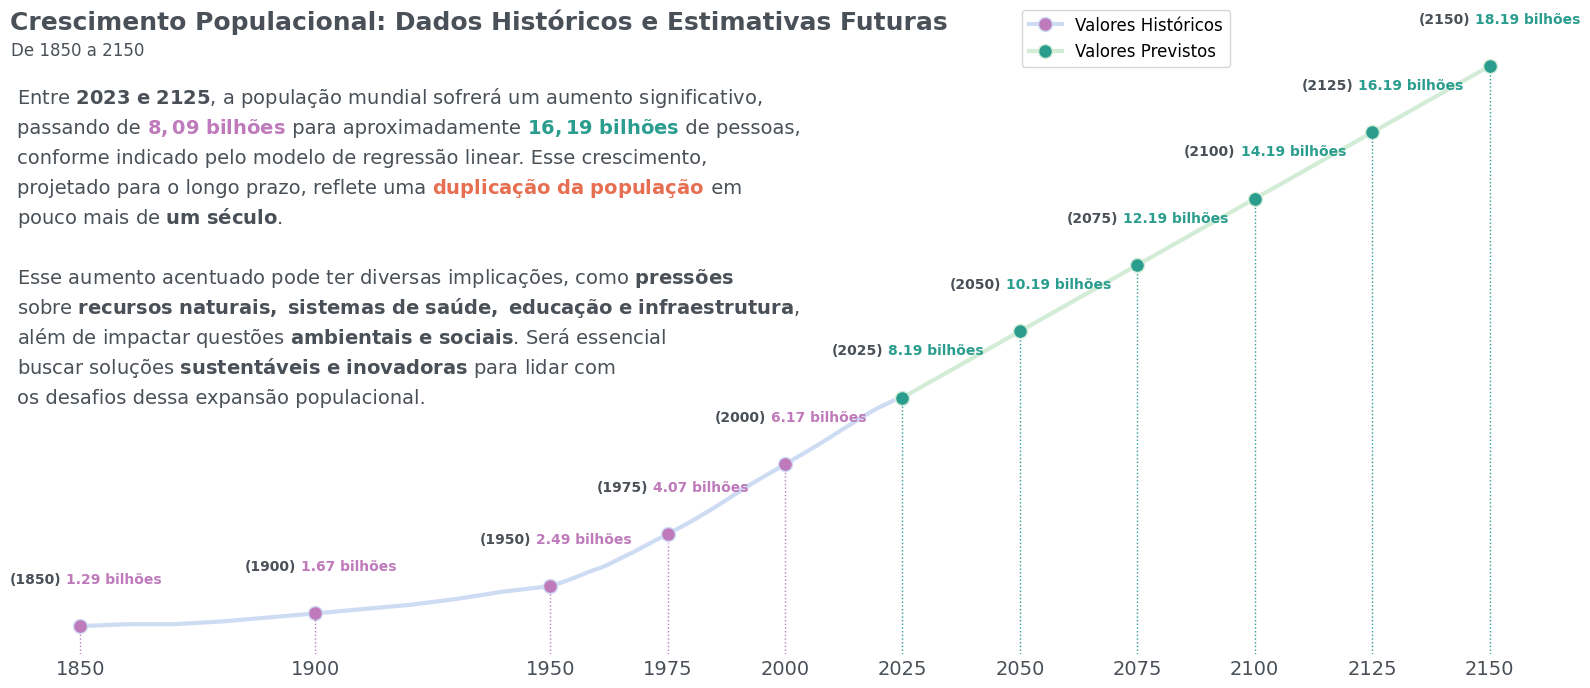

In [13]:
# @title
# Fazendo previsões para os próximos 100 anos
ultimo_ano = X_pop['Year'].max()
df_previsoes = pd.DataFrame({'Year': range(ultimo_ano + 1, ultimo_ano + 128)})

# Prevendo a população ate o ano de 2150
df_previsoes['Population'] = model_pop.predict(df_previsoes)


fig, ax = plt.subplots(figsize=(20, 8))

# Criando uma lista de booleanos para destacar os anos que são múltiplos de 25 ou o ano 2023
pontos_a_marcar = [(Ano % 25 == 0) for Ano in df_pop['Year']]
pontos_a_marcar_futuro = [(Ano % 25 == 0) for Ano in df_previsoes['Year']]

# Plotando o gráfico de linha com pontos destacados
real, = ax.plot(df_pop['Year'], df_pop['Population (historical)'], lw=3, color=AZUL5, marker='o',
                markersize=10, markerfacecolor=ROXO2, markevery=pontos_a_marcar, label='Valores Históricos')
previsto, = ax.plot(df_previsoes['Year'], df_previsoes['Population'], lw=3, color=VERDE3, marker='o',
                    markersize=10, markerfacecolor=VERDE2, markevery=pontos_a_marcar_futuro, label='Valores Previstos')

# Configurando a legenda
ax.legend(handles=[real, previsto], fontsize=12, loc='upper center', bbox_to_anchor=(0.72, 1.06), frameon=True)

# Configurações de título e rótulos
ax.set_title('Crescimento Populacional: Dados Históricos e Estimativas Futuras', fontsize=18, color=CINZA2, loc='left', weight='bold')
ax.text(0.087, 0.98, 'De 1850 a 2150', transform=ax.transAxes, fontsize=12, color=CINZA2, ha='right', va='center')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.set_frame_on(False)
ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)

# Removendo todos os ticks do eixo x e y
ax.tick_params(axis='both', which='both', length=0)

# Adicionando os ticks no eixo X, incluindo os anos adicionais
anos_xticks = [1850, 1900, 1950, 2000, 2050, 2100, 2150, 1975, 2025, 2075, 2125]
ax.set_xticks(anos_xticks)

# Adicionando as anotações para os pontos a cada 25 anos
for i, (year, population) in enumerate(zip(df_pop['Year'], df_pop['Population (historical)'])):
    if year % 25 == 0:
      population_bilhao = population / 1e9
      ax.text(x=year-3,          # Ajuste horizontal
              y=population + 1.3e9,  # Ajuste vertical para evitar sobreposição
              s=f"{population_bilhao:.2f} bilhões",
              color=ROXO2, weight="bold", fontsize=10)
      ax.text(x=year - 15,       # Ajuste horizontal
              y=population + 1.3e9,  # Ajuste vertical para evitar sobreposição
              s=f"({year})",
              color=CINZA2, weight="bold", fontsize=10)

for i, (year, population) in enumerate(zip(df_previsoes['Year'], df_previsoes['Population'])):
    if year % 25 == 0:
      population_bilhao = population / 1e9
      ax.text(x=year-3,          # Ajuste horizontal
              y=population + 1.3e9,  # Ajuste vertical para evitar sobreposição
              s=f"{population_bilhao:.2f} bilhões",
              color=VERDE2, weight="bold", fontsize=10)
      ax.text(x=year - 15,       # Ajuste horizontal
              y=population + 1.3e9,  # Ajuste vertical para evitar sobreposição
              s=f"({year})",
              color=CINZA2, weight="bold", fontsize=10)

texto_colorido(
    1836.5, 8e9,
    'Entre $\\bf{2023\ e\ 2125}$, a população mundial sofrerá um aumento significativo,\n'
    'passando de ||$\\bf{8,09\ bilhões}$|| para aproximadamente ||$\\bf{16,19\ bilhões}$|| de pessoas,\n'
    'conforme indicado pelo modelo de regressão linear. Esse crescimento,\n'
    'projetado para o longo prazo, reflete uma ||$\\bf{duplicação\ da\ população}$|| em\n'
    'pouco mais de $\\bf{um\ século}$.\n'
    '\n'
    'Esse aumento acentuado pode ter diversas implicações, como $\\bf{pressões}$\n'
    'sobre $\\bf{recursos\ naturais,\ sistemas\ de\ saúde,\ educação\ e\ infraestrutura}$,\n'
    'além de impactar questões $\\bf{ambientais\ e\ sociais}$. Será essencial\n'
    'buscar soluções $\\bf{sustentáveis\ e\ inovadoras}$ para lidar com\n'
    'os desafios dessa expansão populacional.',
    [
        [CINZA2],
        [CINZA2, ROXO2, CINZA2, VERDE2, CINZA2],
        [CINZA2],
        [CINZA2, VERMELHO1, CINZA2],
        [CINZA2],
        [CINZA2],
        [CINZA2],
        [CINZA2],
        [CINZA2],
        [CINZA2],
        [CINZA2]
    ],
    esp=30,
    ax=ax,
    fontsize=14
)

#Adicionando linha nos anos
ax.axvline(x= 1.85e3, ymin= 0, ymax= 0.05, color=ROXO2, linewidth=1, linestyle=':')
ax.axvline(x= 1.9e3, ymin= 0, ymax= 0.07, color=ROXO2, linewidth=1, linestyle=':')
ax.axvline(x= 1.95e3, ymin= 0, ymax= 0.1, color=ROXO2, linewidth=1, linestyle=':')
ax.axvline(x= 1.975e3, ymin= 0, ymax= 0.18, color=ROXO2, linewidth=1, linestyle=':')
ax.axvline(x= 2e3, ymin= 0, ymax= 0.3, color=ROXO2, linewidth=1, linestyle=':')

ax.axvline(x= 2.025e3, ymin= 0, ymax= 0.41, color=VERDE2, linewidth=1, linestyle=':')
ax.axvline(x= 2.05e3, ymin= 0, ymax= 0.52, color=VERDE2, linewidth=1, linestyle=':')
ax.axvline(x= 2.075e3, ymin= 0, ymax= 0.62, color=VERDE2, linewidth=1, linestyle=':')
ax.axvline(x= 2.1e3, ymin= 0, ymax= 0.75, color=VERDE2, linewidth=1, linestyle=':')
ax.axvline(x= 2.125e3, ymin= 0, ymax= 0.85, color=VERDE2, linewidth=1, linestyle=':')
ax.axvline(x= 2.15e3, ymin= 0, ymax= 0.95, color=VERDE2, linewidth=1, linestyle=':')

plt.show()

## **Prevendo tendência de valores de emissão de CO₂**


---

### **Criando, treinando e testando o modelo**

Erro Quadrático Médio (MSE): 812786674967236736.00
Coeficiente de Determinação (R²): 0.99


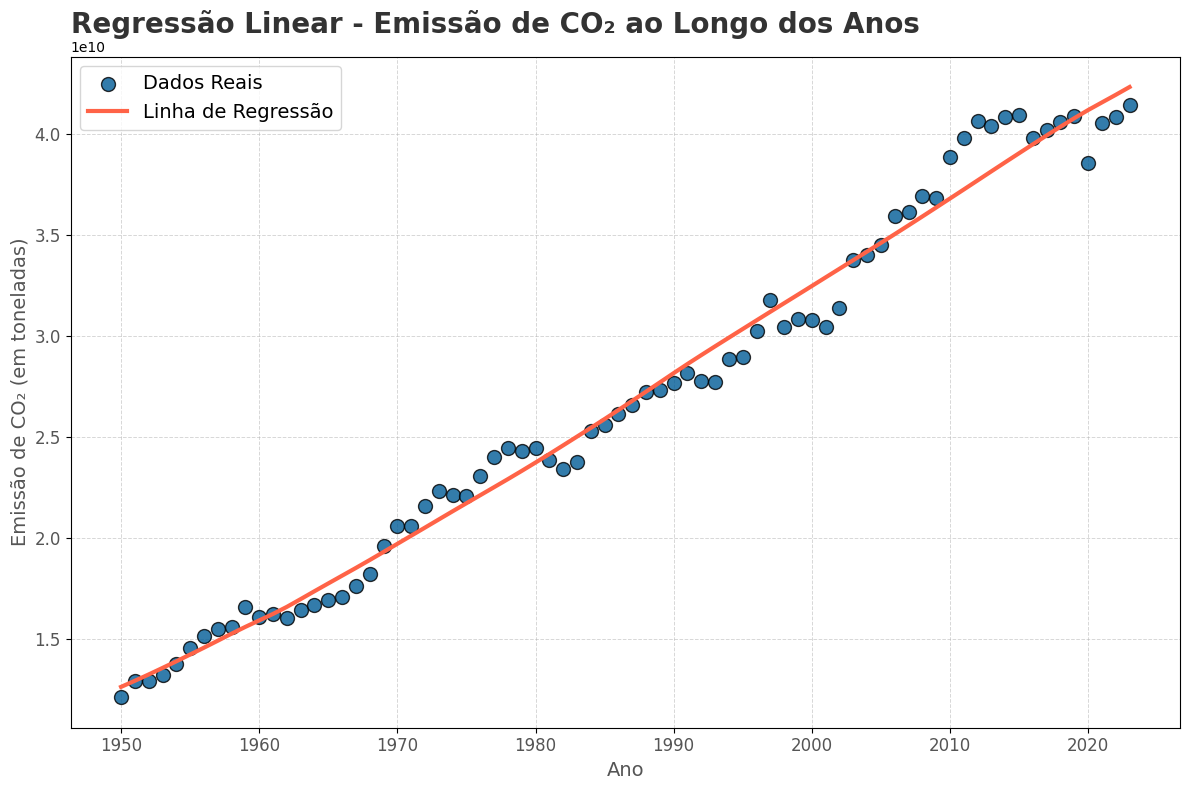

In [14]:
# @title
X_co2 = df_1950[['Year', 'Population']]  # Definindo X
y_co2 = df_1950['CO2 Emissions']         # Definindo Y

# Dividindo os dados em conjuntos de treinamento e teste
X_train_co2, X_test_co2, y_train_co2, y_test_co2 = train_test_split(X_co2, y_co2, test_size=0.2, random_state=37)

# Criando e treinando o modelo
model_co2 = LinearRegression()
model_co2.fit(X_train_co2, y_train_co2)

# Fazendo previsões
y_pred_co2 = model_co2.predict(X_test_co2)

# Avaliando do modelo
mse = mean_squared_error(y_test_co2, y_pred_co2)
r2 = r2_score(y_test_co2, y_pred_co2)

print(f'Erro Quadrático Médio (MSE): {mse:.2f}')
print(f'Coeficiente de Determinação (R²): {r2:.2f}')

# Criando o gráfico
plt.figure(figsize=(12, 8))
plt.scatter(X_co2['Year'], y_co2, color='#005B96', s=100, label='Dados Reais', zorder=5, edgecolors='black', alpha=0.8)  # Pontos com borda preta e alpha
plt.plot(X_co2['Year'], model_co2.predict(X_co2), color='#FF6347', lw=3, label='Linha de Regressão', linestyle='-', zorder=10)  # Linha de regressão vermelha

# Ajustes de título, rótulos e legenda
plt.title('Regressão Linear - Emissão de CO₂ ao Longo dos Anos', fontsize=20, color='#333333', weight='bold', loc='left')
plt.xlabel('Ano', fontsize=14, color='#555555')
plt.ylabel('Emissão de CO₂ (em toneladas)', fontsize=14, color='#555555')

# Personalizando as fontes e estilo dos rótulos
plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')

# Melhorando a legenda
plt.legend(loc='upper left', fontsize=14, fancybox=True, framealpha=0.8)

# Adicionando uma grade suave
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.5)

# Ajuste final de margens
plt.tight_layout()

# Exibindo o gráfico
plt.show()


## **Aplicando modelo para prever valores ate 2150**

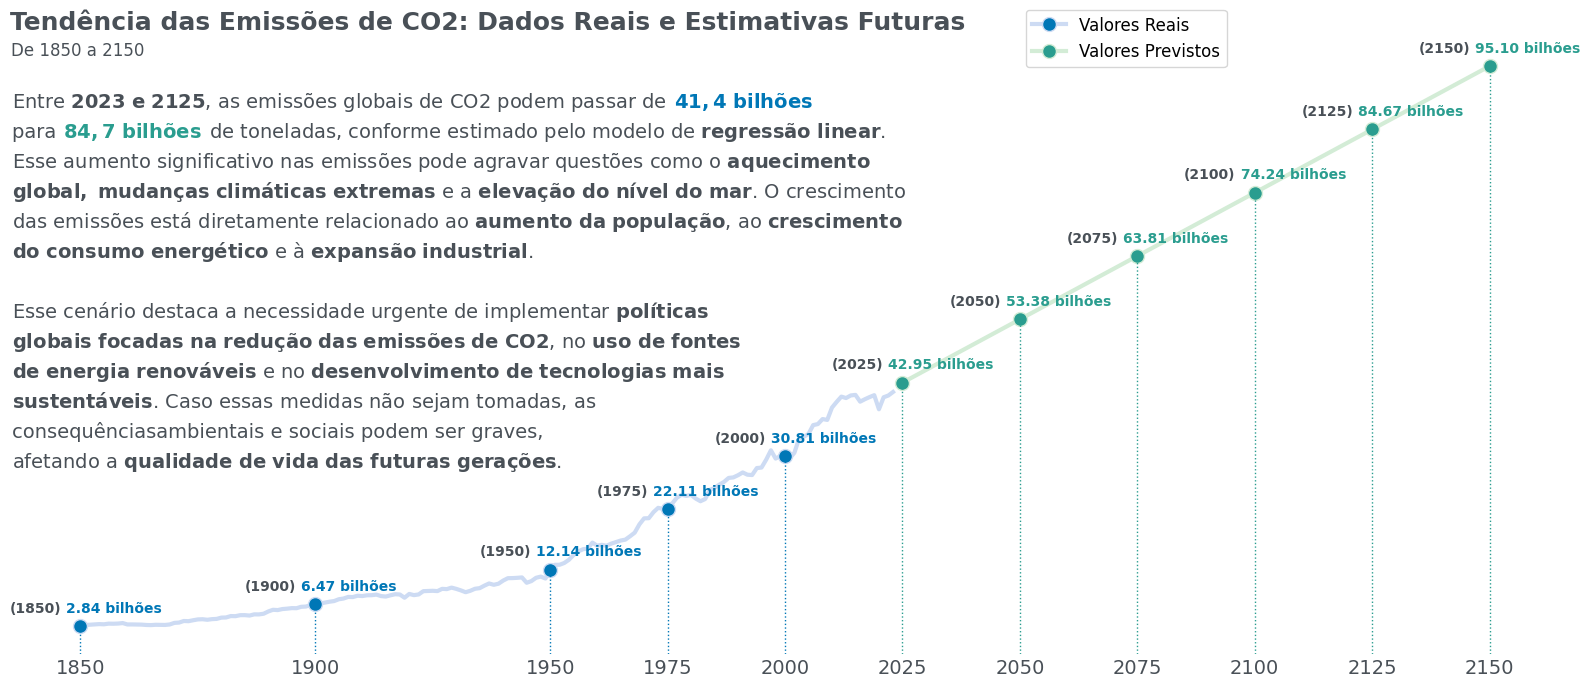

In [15]:
# @title
df_previsoes['CO2 Emissions'] = model_co2.predict(df_previsoes[['Year', 'Population']])

fig, ax = plt.subplots(figsize=(20, 8))

# Criando uma lista de booleanos para destacar os anos que são múltiplos de 25 ou o ano 2023
pontos_a_marcar = [(Ano != 1875 and Ano != 1925 and Ano % 25 == 0) for Ano in df_co2['Year']]
pontos_a_marcar_futuro = [(Ano % 25 == 0) for Ano in df_previsoes['Year']]

# Plotando o gráfico de linha com pontos destacados
real, = ax.plot(df_co2['Year'], df_co2['CO2 Emissions'], lw=3, color=AZUL5, marker='o',
                markersize=10, markerfacecolor=AZUL2, markevery=pontos_a_marcar, label='Valores Reais')
previsto, = ax.plot(df_previsoes['Year'], df_previsoes['CO2 Emissions'], lw=3, color=VERDE3, marker='o',
                    markersize=10, markerfacecolor=VERDE2, markevery=pontos_a_marcar_futuro, label='Valores Previstos')

# Configurando a legenda
ax.legend(handles=[real, previsto], fontsize=12, loc='upper center', bbox_to_anchor=(0.72, 1.06), frameon=True)

# Configurações de título e rótulos
ax.set_title('Tendência das Emissões de CO2: Dados Reais e Estimativas Futuras', fontsize=18, color=CINZA2, loc='left', weight='bold')
ax.text(0.087, 0.98, 'De 1850 a 2150', transform=ax.transAxes, fontsize=12, color=CINZA2, ha='right', va='center')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.set_frame_on(False)
ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)

# Removendo todos os ticks do eixo x e y
ax.tick_params(axis='both', which='both', length=0)

# Adicionando os ticks no eixo X, incluindo os anos adicionais
anos_xticks = [1850, 1900, 1950, 1975, 2000, 2025, 2050, 2075, 2100, 2125, 2150]
ax.set_xticks(anos_xticks)

# Adicionando as anotações para os pontos a cada 25 anos
for i, (year, emission) in enumerate(zip(df_co2['Year'], df_co2['CO2 Emissions'])):
    if year != 1875 and year != 1925 and year % 25 == 0:
      emission_bilhao = emission / 1e9
      ax.text(x=year-3,          # Ajuste horizontal
              y=emission + 2.3e9,  # Ajuste vertical para evitar sobreposição
              s=f"{emission_bilhao:.2f} bilhões",
              color=AZUL2, weight="bold", fontsize=10)
      ax.text(x=year - 15,       # Ajuste horizontal
              y=emission + 2.3e9,  # Ajuste vertical para evitar sobreposição
              s=f"({year})",
              color=CINZA2, weight="bold", fontsize=10)

for i, (year, emission) in enumerate(zip(df_previsoes['Year'], df_previsoes['CO2 Emissions'])):
    if year % 25 == 0:
      emission_bilhao = emission / 1e9
      ax.text(x=year-3,          # Ajuste horizontal
              y=emission + 2.3e9,  # Ajuste vertical para evitar sobreposição
              s=f"{emission_bilhao:.2f} bilhões",
              color=VERDE2, weight="bold", fontsize=10)
      ax.text(x=year - 15,       # Ajuste horizontal
              y=emission + 2.3e9,  # Ajuste vertical para evitar sobreposição
              s=f"({year})",
              color=CINZA2, weight="bold", fontsize=10)

texto_colorido(
    1835.5, 2.9e10,
    'Entre $\\bf{2023\ e\ 2125}$, as emissões globais de CO2 podem passar de || $\\bf{41,4\ bilhões}$\n'
    'para ||$\\bf{84,7\ bilhões}$ || de toneladas, conforme estimado pelo modelo de $\\bf{regressão\ linear}$.\n'
    'Esse aumento significativo nas emissões pode agravar questões como o $\\bf{aquecimento}$\n'
    '$\\bf{global,\ mudanças\ climáticas\ extremas}$ e a $\\bf{elevação\ do\ nível\ do\ mar}$. O crescimento\n'
    'das emissões está diretamente relacionado ao $\\bf{aumento\ da\ população}$, ao $\\bf{crescimento}$\n'
    '$\\bf{do\ consumo\ energético}$ e à $\\bf{expansão\ industrial}$.\n'
    '\n'
    'Esse cenário destaca a necessidade urgente de implementar $\\bf{políticas}$\n'
    '$\\bf{globais\ focadas\ na\ redução\ das\ emissões\ de\ CO2}$, no $\\bf{uso\ de\ fontes}$\n'
    '$\\bf{de\ energia\ renováveis}$ e no $\\bf{desenvolvimento\ de\ tecnologias\ mais}$\n'
    '$\\bf{sustentáveis}$. Caso essas medidas não sejam tomadas, as\n'
    'consequênciasambientais e sociais podem ser graves,\n'
    'afetando a $\\bf{qualidade\ de\ vida\ das\ futuras\ gerações}$.',
    [
        [CINZA2, AZUL2],
        [CINZA2, VERDE2, CINZA2],
        [CINZA2],
        [CINZA2],
        [CINZA2],
        [CINZA2],
        [CINZA2],
        [CINZA2],
        [CINZA2],
        [CINZA2],
        [CINZA2],
        [CINZA2],
        [CINZA2]
    ],
    esp=30,
    ax=ax,
    fontsize=14
)

#Adicionando linha nos anos
ax.axvline(x= 1.85e3, ymin= 0, ymax= 0.05, color=AZUL2, linewidth=1, linestyle=':')
ax.axvline(x= 1.9e3, ymin= 0, ymax= 0.07, color=AZUL2, linewidth=1, linestyle=':')
ax.axvline(x= 1.95e3, ymin= 0, ymax= 0.15, color=AZUL2, linewidth=1, linestyle=':')
ax.axvline(x= 1.975e3, ymin= 0, ymax= 0.24, color=AZUL2, linewidth=1, linestyle=':')
ax.axvline(x= 2e3, ymin= 0, ymax= 0.32, color=AZUL2, linewidth=1, linestyle=':')

ax.axvline(x= 2.025e3, ymin= 0, ymax= 0.44, color=VERDE2, linewidth=1, linestyle=':')
ax.axvline(x= 2.05e3, ymin= 0, ymax= 0.54, color=VERDE2, linewidth=1, linestyle=':')
ax.axvline(x= 2.075e3, ymin= 0, ymax= 0.64, color=VERDE2, linewidth=1, linestyle=':')
ax.axvline(x= 2.1e3, ymin= 0, ymax= 0.75, color=VERDE2, linewidth=1, linestyle=':')
ax.axvline(x= 2.125e3, ymin= 0, ymax= 0.85, color=VERDE2, linewidth=1, linestyle=':')
ax.axvline(x= 2.15e3, ymin= 0, ymax= 0.95, color=VERDE2, linewidth=1, linestyle=':')

plt.show()

## **Prevendo Gás Metano**


---



### **Criando, treinando e testando o modelo**

Erro Quadrático Médio (MSE): 21750857945339844.00
Coeficiente de Determinação (R²): 0.99


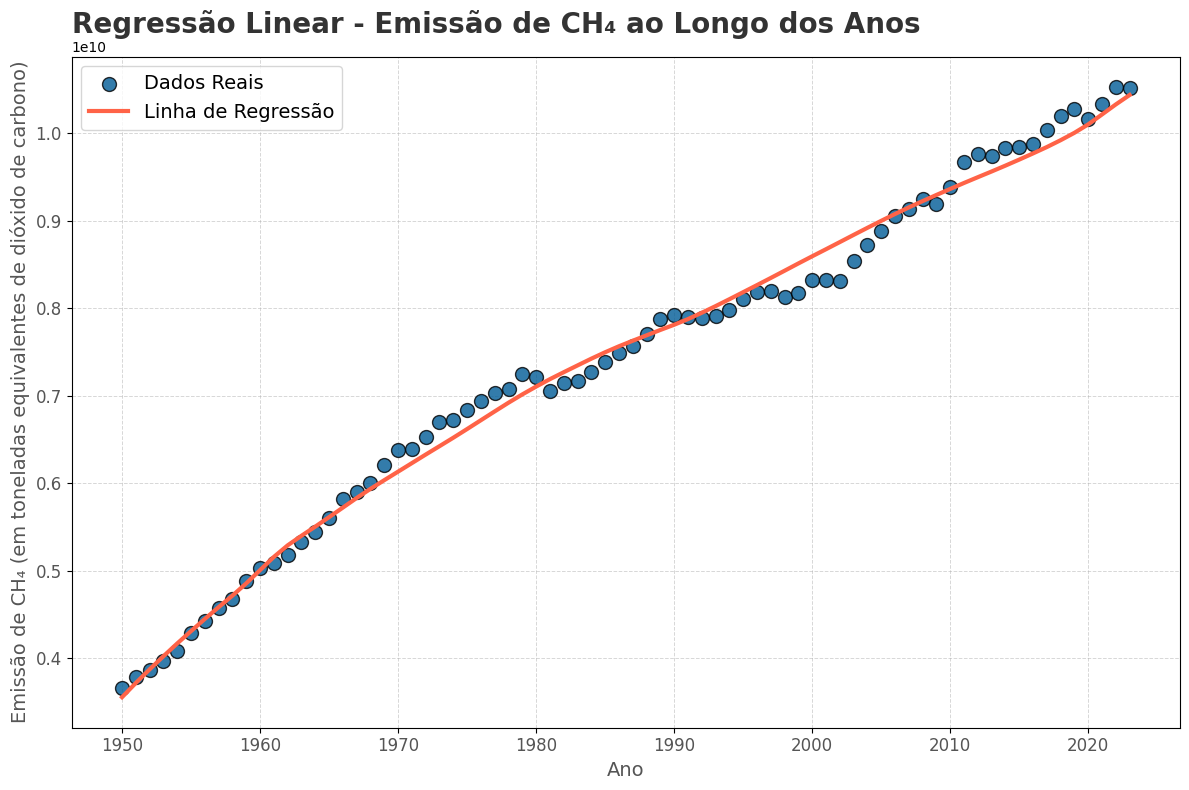

In [16]:
# @title
X_ch4 = df_1950[['Year', 'Population']]  # Definindo X
y_ch4 = df_1950['CH4 Emissions']         # Definindo Y

# Dividindo os dados em conjuntos de treinamento e teste
X_train_ch4, X_test_ch4, y_train_ch4, y_test_ch4 = train_test_split(X_ch4, y_ch4, test_size=0.2, random_state=37)

# Criando e treinando o modelo
model_ch4 = LinearRegression()
model_ch4.fit(X_train_ch4, y_train_ch4)

# Fazendo previsões
y_pred_ch4 = model_ch4.predict(X_test_ch4)

# Avaliando do modelo
mse = mean_squared_error(y_test_ch4, y_pred_ch4)
r2 = r2_score(y_test_ch4, y_pred_ch4)

print(f'Erro Quadrático Médio (MSE): {mse:.2f}')
print(f'Coeficiente de Determinação (R²): {r2:.2f}')

# Criando o gráfico
plt.figure(figsize=(12, 8))
plt.scatter(X_ch4['Year'], y_ch4, color='#005B96', s=100, label='Dados Reais', zorder=5, edgecolors='black', alpha=0.8)  # Pontos com borda preta e alpha
plt.plot(X_ch4['Year'], model_ch4.predict(X_ch4), color='#FF6347', lw=3, label='Linha de Regressão', linestyle='-', zorder=10)  # Linha de regressão vermelha

# Ajustes de título, rótulos e legenda
plt.title('Regressão Linear - Emissão de CH₄ ao Longo dos Anos', fontsize=20, color='#333333', weight='bold', loc='left')
plt.xlabel('Ano', fontsize=14, color='#555555')
plt.ylabel('Emissão de CH₄ (em toneladas equivalentes de dióxido de carbono)', fontsize=14, color='#555555')

# Personalizando as fontes e estilo dos rótulos
plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')

# Melhorando a legenda
plt.legend(loc='upper left', fontsize=14, fancybox=True, framealpha=0.8)

# Adicionando uma grade suave
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.5)

# Ajuste final de margens
plt.tight_layout()

# Exibindo o gráfico
plt.show()


## **Aplicando modelo para prever valores ate 2150**

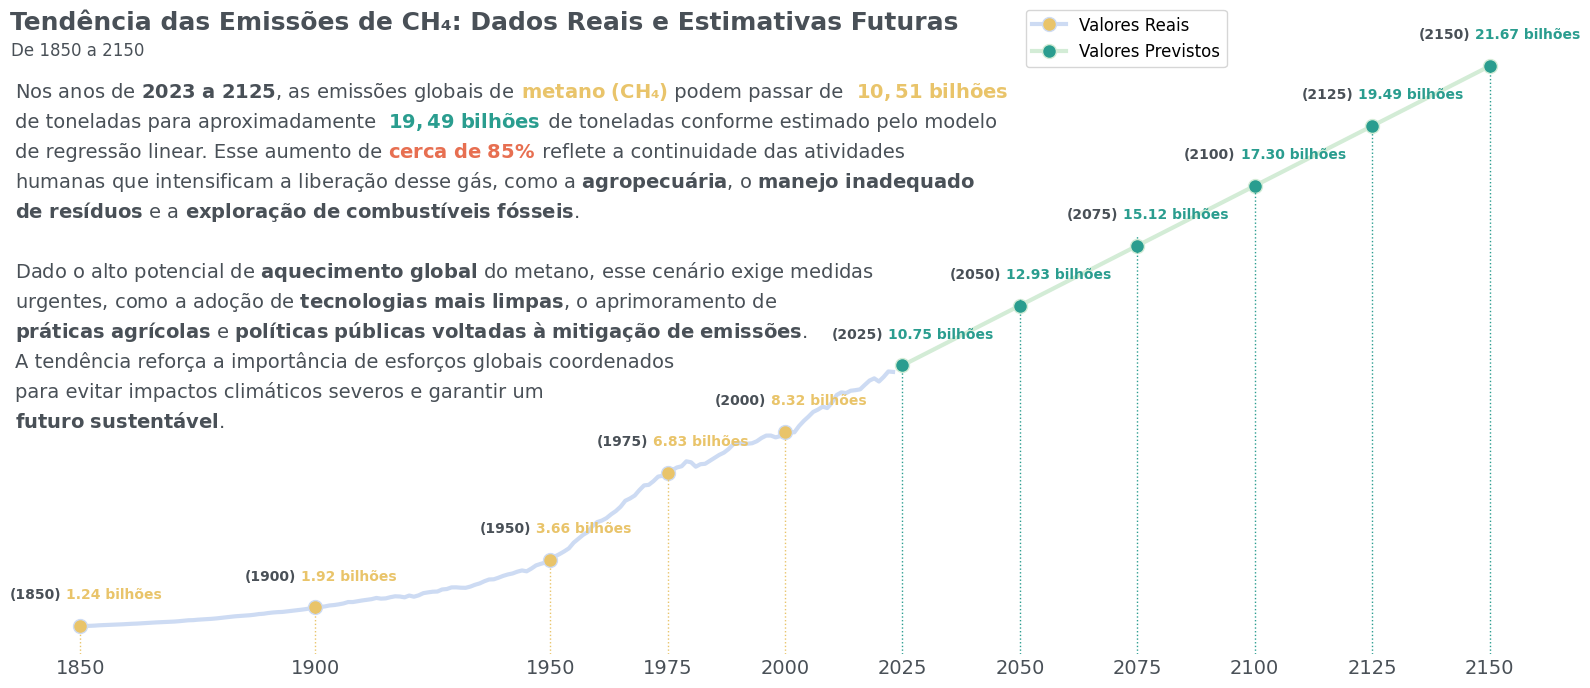

In [17]:
# @title
df_previsoes['CH4 Emissions'] = model_ch4.predict(df_previsoes[['Year', 'Population']])

fig, ax = plt.subplots(figsize=(20, 8))

# Criando uma lista de booleanos para destacar os anos que são múltiplos de 25 ou o ano 2023
pontos_a_marcar = [(Ano != 1875 and Ano != 1925 and Ano % 25 == 0) for Ano in df_ch4['Year']]
pontos_a_marcar_futuro = [(Ano % 25 == 0) for Ano in df_previsoes['Year']]

# Plotando o gráfico de linha com pontos destacados
real, = ax.plot(df_ch4['Year'], df_ch4['CH4 Emissions'], lw=3, color=AZUL5, marker='o',
                markersize=10, markerfacecolor=AMARELO1, markevery=pontos_a_marcar, label='Valores Reais')
previsto, = ax.plot(df_previsoes['Year'], df_previsoes['CH4 Emissions'], lw=3, color=VERDE3, marker='o',
                    markersize=10, markerfacecolor=VERDE2, markevery=pontos_a_marcar_futuro, label='Valores Previstos')

# Configurando a legenda
ax.legend(handles=[real, previsto], fontsize=12, loc='upper center', bbox_to_anchor=(0.72, 1.06), frameon=True)

# Configurações de título e rótulos
ax.set_title('Tendência das Emissões de CH₄: Dados Reais e Estimativas Futuras', fontsize=18, color=CINZA2, loc='left', weight='bold')
ax.text(0.087, 0.98, 'De 1850 a 2150', transform=ax.transAxes, fontsize=12, color=CINZA2, ha='right', va='center')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.set_frame_on(False)
ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)

# Removendo todos os ticks do eixo x e y
ax.tick_params(axis='both', which='both', length=0)

# Adicionando os ticks no eixo X, incluindo os anos adicionais
anos_xticks = [1850, 1900, 1950, 1975, 2000, 2025, 2050, 2075, 2100, 2125, 2150]
ax.set_xticks(anos_xticks)

# Adicionando as anotações para os pontos a cada 25 anos
for i, (year, emission) in enumerate(zip(df_ch4['Year'], df_ch4['CH4 Emissions'])):
    if year != 1875 and year != 1925 and year % 25 == 0:
      emission_bilhao = emission / 1e9
      ax.text(x=year-3,          # Ajuste horizontal
              y=emission + 1e9,  # Ajuste vertical para evitar sobreposição
              s=f"{emission_bilhao:.2f} bilhões",
              color=AMARELO1, weight="bold", fontsize=10)
      ax.text(x=year - 15,       # Ajuste horizontal
              y=emission + 1e9,  # Ajuste vertical para evitar sobreposição
              s=f"({year})",
              color=CINZA2, weight="bold", fontsize=10)

for i, (year, emission) in enumerate(zip(df_previsoes['Year'], df_previsoes['CH4 Emissions'])):
    if year % 25 == 0:
      emission_bilhao = emission / 1e9
      ax.text(x=year-3,          # Ajuste horizontal
              y=emission + 1e9,  # Ajuste vertical para evitar sobreposição
              s=f"{emission_bilhao:.2f} bilhões",
              color=VERDE2, weight="bold", fontsize=10)
      ax.text(x=year - 15,       # Ajuste horizontal
              y=emission + 1e9,  # Ajuste vertical para evitar sobreposição
              s=f"({year})",
              color=CINZA2, weight="bold", fontsize=10)

texto_colorido(
    1836, 8.5e9,
    'Nos anos de $\\bf{2023\ a\ 2125}$, as emissões globais de || $\\bf{metano\ (CH₄)}$|| podem passar de || $\\bf{10,51\ bilhões}$\n'
    'de toneladas para aproximadamente || $\\bf{19,49\ bilhões}$ || de toneladas conforme estimado pelo modelo\n'
    'de regressão linear. Esse aumento de ||$\\bf{cerca\ de\ 85\%}$ || reflete a continuidade das atividades\n'
    'humanas que intensificam a liberação desse gás, como a $\\bf{agropecuária}$, o $\\bf{manejo\ inadequado}$\n'
    '$\\bf{de\ resíduos}$ e a $\\bf{exploração\ de\ combustíveis\ fósseis}$.\n'
    '\n'
    'Dado o alto potencial de $\\bf{aquecimento\ global}$ do metano, esse cenário exige medidas\n'
    'urgentes, como a adoção de $\\bf{tecnologias\ mais\ limpas}$, o aprimoramento de\n'
    '$\\bf{práticas\ agrícolas}$ e $\\bf{políticas\ públicas\ voltadas\ à\ mitigação\ de\ emissões}$.\n'
    'A tendência reforça a importância de esforços globais coordenados \n'
    'para evitar impactos climáticos severos e garantir um\n'
    '$\\bf{futuro\ sustentável}$.',
    [
        [CINZA2, AMARELO1, CINZA2, AMARELO1],
        [CINZA2, VERDE2, CINZA2],
        [CINZA2, VERMELHO1, CINZA2],
        [CINZA2],
        [CINZA2],
        [CINZA2],
        [CINZA2],
        [CINZA2],
        [CINZA2],
        [CINZA2],
        [CINZA2],
        [CINZA2]
    ],
    esp=30,
    ax=ax,
    fontsize=14
)

#Adicionando linha nos anos
ax.axvline(x= 1.85e3, ymin= 0, ymax= 0.05, color=AMARELO1, linewidth=1, linestyle=':')
ax.axvline(x= 1.9e3, ymin= 0, ymax= 0.07, color=AMARELO1, linewidth=1, linestyle=':')
ax.axvline(x= 1.95e3, ymin= 0, ymax= 0.15, color=AMARELO1, linewidth=1, linestyle=':')
ax.axvline(x= 1.975e3, ymin= 0, ymax= 0.3, color=AMARELO1, linewidth=1, linestyle=':')
ax.axvline(x= 2e3, ymin= 0, ymax= 0.36, color=AMARELO1, linewidth=1, linestyle=':')

ax.axvline(x= 2.025e3, ymin= 0, ymax= 0.47, color=VERDE2, linewidth=1, linestyle=':')
ax.axvline(x= 2.05e3, ymin= 0, ymax= 0.58, color=VERDE2, linewidth=1, linestyle=':')
ax.axvline(x= 2.075e3, ymin= 0, ymax= 0.68, color=VERDE2, linewidth=1, linestyle=':')
ax.axvline(x= 2.1e3, ymin= 0, ymax= 0.75, color=VERDE2, linewidth=1, linestyle=':')
ax.axvline(x= 2.125e3, ymin= 0, ymax= 0.85, color=VERDE2, linewidth=1, linestyle=':')
ax.axvline(x= 2.15e3, ymin= 0, ymax= 0.95, color=VERDE2, linewidth=1, linestyle=':')

plt.show()

## **Prevendo Óxido Nitroso**


---



### **Criando, treinando e testando o modelo**

Erro Quadrático Médio (MSE): 3452184154519118.00
Coeficiente de Determinação (R²): 0.99


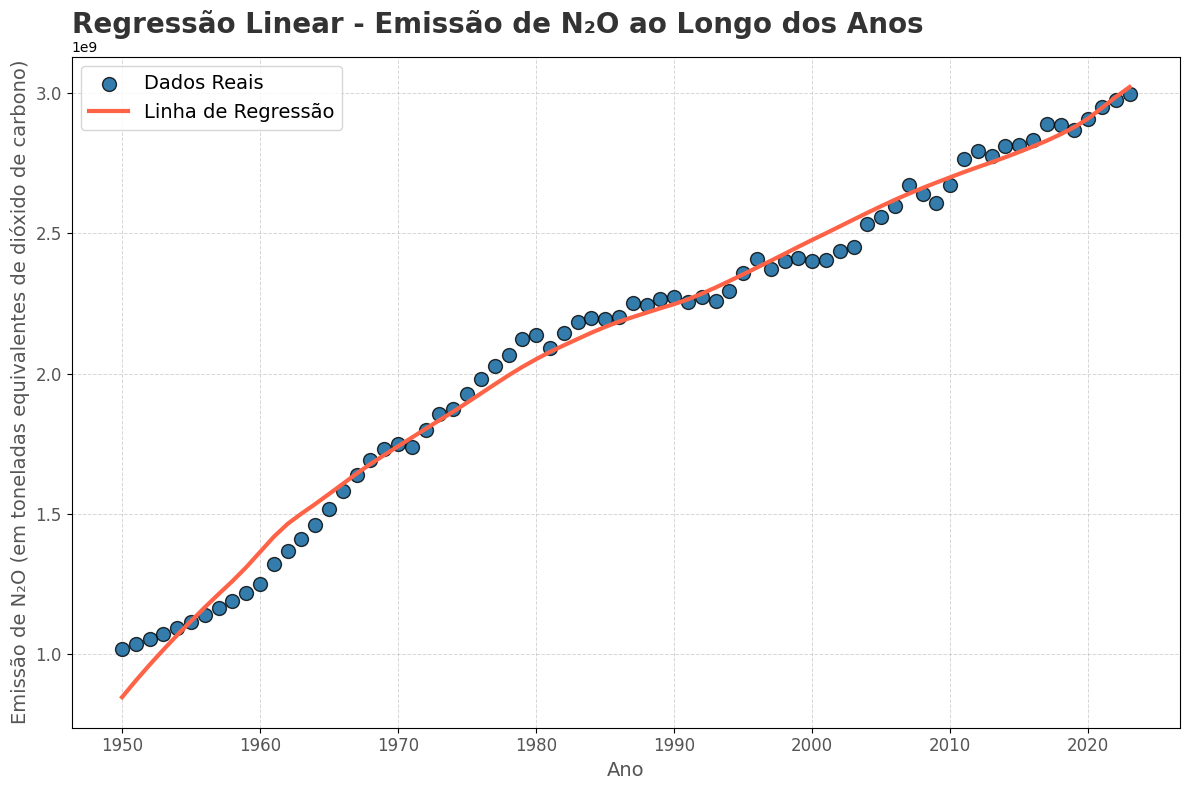

In [18]:
# @title
X_n2o = df_1950[['Year', 'Population']]  # Definindo X
y_n2o = df_1950['N2O Emissions']         # Definindo Y

# Dividindo os dados em conjuntos de treinamento e teste
X_train_n2o, X_test_n2o, y_train_n2o, y_test_n2o = train_test_split(X_n2o, y_n2o, test_size=0.2, random_state=37)

# Criando e treinando o modelo
model_n2o = LinearRegression()
model_n2o.fit(X_train_n2o, y_train_n2o)

# Fazendo previsões
y_pred_ch4 = model_n2o.predict(X_test_n2o)

# Avaliando do modelo
mse = mean_squared_error(y_test_n2o, y_pred_ch4)
r2 = r2_score(y_test_n2o, y_pred_ch4)

print(f'Erro Quadrático Médio (MSE): {mse:.2f}')
print(f'Coeficiente de Determinação (R²): {r2:.2f}')

# Criando o gráfico
plt.figure(figsize=(12, 8))
plt.scatter(X_n2o['Year'], y_n2o, color='#005B96', s=100, label='Dados Reais', zorder=5, edgecolors='black', alpha=0.8)  # Pontos com borda preta e alpha
plt.plot(X_n2o['Year'], model_n2o.predict(X_n2o), color='#FF6347', lw=3, label='Linha de Regressão', linestyle='-', zorder=10)  # Linha de regressão vermelha

# Ajustes de título, rótulos e legenda
plt.title('Regressão Linear - Emissão de N₂O ao Longo dos Anos', fontsize=20, color='#333333', weight='bold', loc='left')
plt.xlabel('Ano', fontsize=14, color='#555555')
plt.ylabel('Emissão de N₂O (em toneladas equivalentes de dióxido de carbono)', fontsize=14, color='#555555')

# Personalizando as fontes e estilo dos rótulos
plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')

# Melhorando a legenda
plt.legend(loc='upper left', fontsize=14, fancybox=True, framealpha=0.8)

# Adicionando uma grade suave
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.5)

# Ajuste final de margens
plt.tight_layout()

# Exibindo o gráfico
plt.show()


## **Aplicando modelo para prever valores ate 2150**

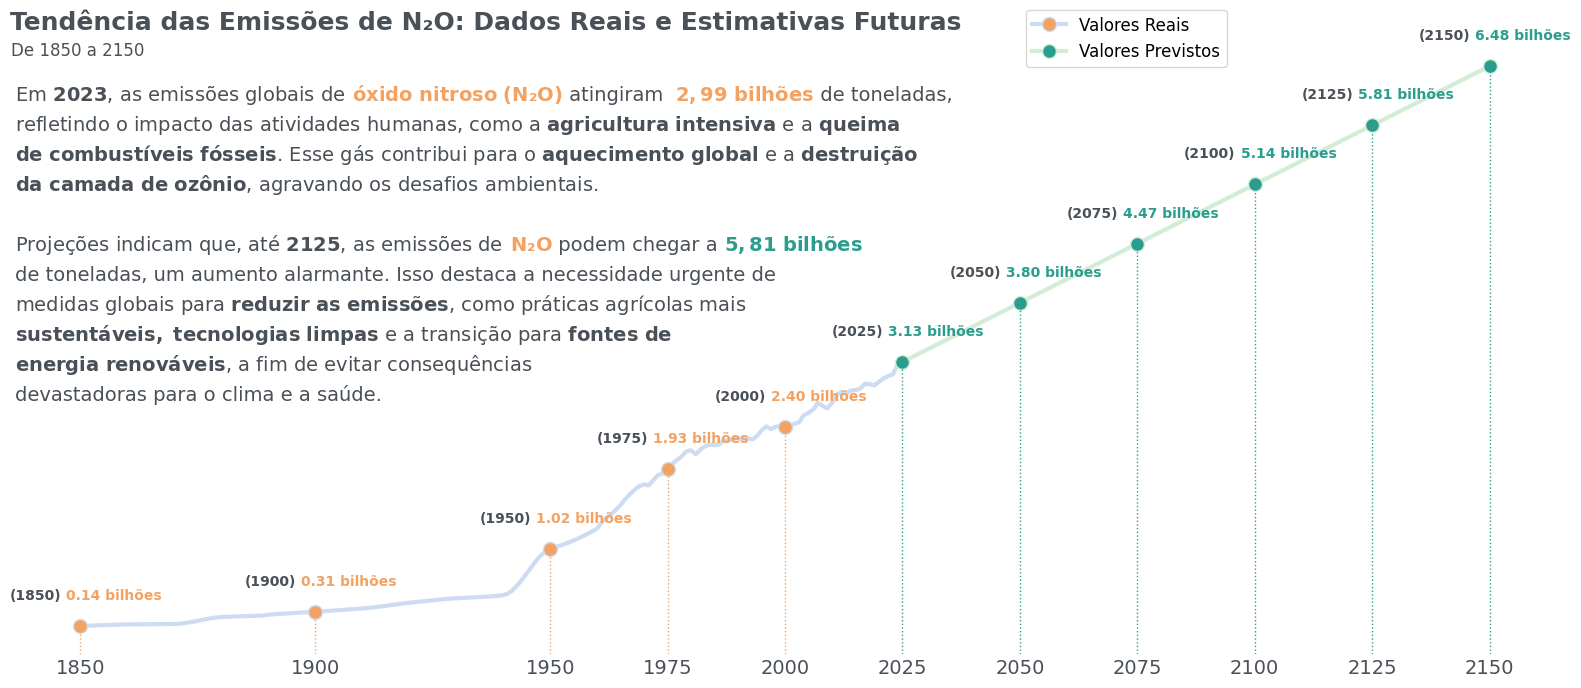

In [19]:
# @title
# Adicionando a nova linha para desfazer separação entre as linhas real e prevista
nova_linha = {'Entity': 'World', 'Year': 2024, 'N2O Emissions': 3108144003}
df_nox.loc[len(df_nox)] = nova_linha
df_nox['Year'] = df_nox['Year'].astype(int)

df_previsoes['N2O Emissions'] = model_n2o.predict(df_previsoes[['Year', 'Population']])

fig, ax = plt.subplots(figsize=(20, 8))

# Criando uma lista de booleanos para destacar os anos que são múltiplos de 25 ou o ano 2023
pontos_a_marcar = [(Ano != 1875 and Ano != 1925 and Ano % 25 == 0) for Ano in df_nox['Year']]
pontos_a_marcar_futuro = [(Ano % 25 == 0) for Ano in df_previsoes['Year']]

# Plotando o gráfico de linha com pontos destacados
real, = ax.plot(df_nox['Year'], df_nox['N2O Emissions'], lw=3, color=AZUL5, marker='o',
                markersize=10, markerfacecolor=LARANJA1, markevery=pontos_a_marcar, label='Valores Reais')
previsto, = ax.plot(df_previsoes['Year'], df_previsoes['N2O Emissions'], lw=3, color=VERDE3, marker='o',
                    markersize=10, markerfacecolor=VERDE2, markevery=pontos_a_marcar_futuro, label='Valores Previstos')

# Configurando a legenda
ax.legend(handles=[real, previsto], fontsize=12, loc='upper center', bbox_to_anchor=(0.72, 1.06), frameon=True)

# Configurações de título e rótulos
ax.set_title('Tendência das Emissões de N₂O: Dados Reais e Estimativas Futuras', fontsize=18, color=CINZA2, loc='left', weight='bold')
ax.text(0.087, 0.98, 'De 1850 a 2150', transform=ax.transAxes, fontsize=12, color=CINZA2, ha='right', va='center')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.set_frame_on(False)
ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)

# Removendo todos os ticks do eixo x e y
ax.tick_params(axis='both', which='both', length=0)

# Adicionando os ticks no eixo X, incluindo os anos adicionais
anos_xticks = [1850, 1900, 1950, 1975, 2000, 2025, 2050, 2075, 2100, 2125, 2150]
ax.set_xticks(anos_xticks)

# Adicionando as anotações para os pontos a cada 25 anos
for i, (year, emission) in enumerate(zip(df_nox['Year'], df_nox['N2O Emissions'])):
    if year != 1875 and year != 1925 and year % 25 == 0:
      emission_bilhao = emission / 1e9
      ax.text(x=year-3,          # Ajuste horizontal
              y=emission + 3e8,  # Ajuste vertical para evitar sobreposição
              s=f"{emission_bilhao:.2f} bilhões",
              color=LARANJA1, weight="bold", fontsize=10)
      ax.text(x=year - 15,       # Ajuste horizontal
              y=emission + 3e8,  # Ajuste vertical para evitar sobreposição
              s=f"({year})",
              color=CINZA2, weight="bold", fontsize=10)

for i, (year, emission) in enumerate(zip(df_previsoes['Year'], df_previsoes['N2O Emissions'])):
    if year % 25 == 0:
      emission_bilhao = emission / 1e9
      ax.text(x=year-3,          # Ajuste horizontal
              y=emission + 3e8,  # Ajuste vertical para evitar sobreposição
              s=f"{emission_bilhao:.2f} bilhões",
              color=VERDE2, weight="bold", fontsize=10)
      ax.text(x=year - 15,       # Ajuste horizontal
              y=emission + 3e8,  # Ajuste vertical para evitar sobreposição
              s=f"({year})",
              color=CINZA2, weight="bold", fontsize=10)

texto_colorido(
    1836, 2.7e9,
    'Em $\\bf{2023}$, as emissões globais de || $\\bf{óxido\ nitroso\ (N₂O)}$|| atingiram || $\\bf{2,99\ bilhões}$|| de toneladas,\n'
    'refletindo o impacto das atividades humanas, como a $\\bf{agricultura\ intensiva}$ e a $\\bf{queima}$\n'
    '$\\bf{de\ combustíveis\ fósseis}$. Esse gás contribui para o $\\bf{aquecimento\ global}$ e a $\\bf{destruição}$\n'
    '$\\bf{da\ camada\ de\ ozônio}$, agravando os desafios ambientais.\n'
    '\n'
    'Projeções indicam que, até $\\bf{2125}$, as emissões de || $\\bf{N₂O}$|| podem chegar a ||$\\bf{5,81\ bilhões}$\n'
    'de toneladas, um aumento alarmante. Isso destaca a necessidade urgente de\n'
    'medidas globais para $\\bf{reduzir\ as\ emissões}$, como práticas agrícolas mais\n'
    '$\\bf{sustentáveis,\ tecnologias\ limpas}$ e a transição para $\\bf{fontes\ de}$\n'
    '$\\bf{energia\ renováveis}$, a fim de evitar consequências \n'
    'devastadoras para o clima e a saúde.',
    [
        [CINZA2, LARANJA1, CINZA2, LARANJA1, CINZA2],
        [CINZA2],
        [CINZA2],
        [CINZA2],
        [CINZA2],
        [CINZA2, LARANJA1, CINZA2, VERDE2],
        [CINZA2],
        [CINZA2],
        [CINZA2],
        [CINZA2],
        [CINZA2]
    ],
    esp=30,
    ax=ax,
    fontsize=14
)

#Adicionando linha nos anos
ax.axvline(x= 1.85e3, ymin= 0, ymax= 0.05, color=LARANJA1, linewidth=1, linestyle=':')
ax.axvline(x= 1.9e3, ymin= 0, ymax= 0.07, color=LARANJA1, linewidth=1, linestyle=':')
ax.axvline(x= 1.95e3, ymin= 0, ymax= 0.17, color=LARANJA1, linewidth=1, linestyle=':')
ax.axvline(x= 1.975e3, ymin= 0, ymax= 0.3, color=LARANJA1, linewidth=1, linestyle=':')
ax.axvline(x= 2e3, ymin= 0, ymax= 0.36, color=LARANJA1, linewidth=1, linestyle=':')

ax.axvline(x= 2.025e3, ymin= 0, ymax= 0.47, color=VERDE2, linewidth=1, linestyle=':')
ax.axvline(x= 2.05e3, ymin= 0, ymax= 0.58, color=VERDE2, linewidth=1, linestyle=':')
ax.axvline(x= 2.075e3, ymin= 0, ymax= 0.66, color=VERDE2, linewidth=1, linestyle=':')
ax.axvline(x= 2.1e3, ymin= 0, ymax= 0.75, color=VERDE2, linewidth=1, linestyle=':')
ax.axvline(x= 2.125e3, ymin= 0, ymax= 0.85, color=VERDE2, linewidth=1, linestyle=':')
ax.axvline(x= 2.15e3, ymin= 0, ymax= 0.95, color=VERDE2, linewidth=1, linestyle=':')

plt.show()

## **Prevendo temperatura**


---



### **Criando, treinando e testando o modelo**

Erro Quadrático Médio (MSE): 0.00
Coeficiente de Determinação (R²): 1.00


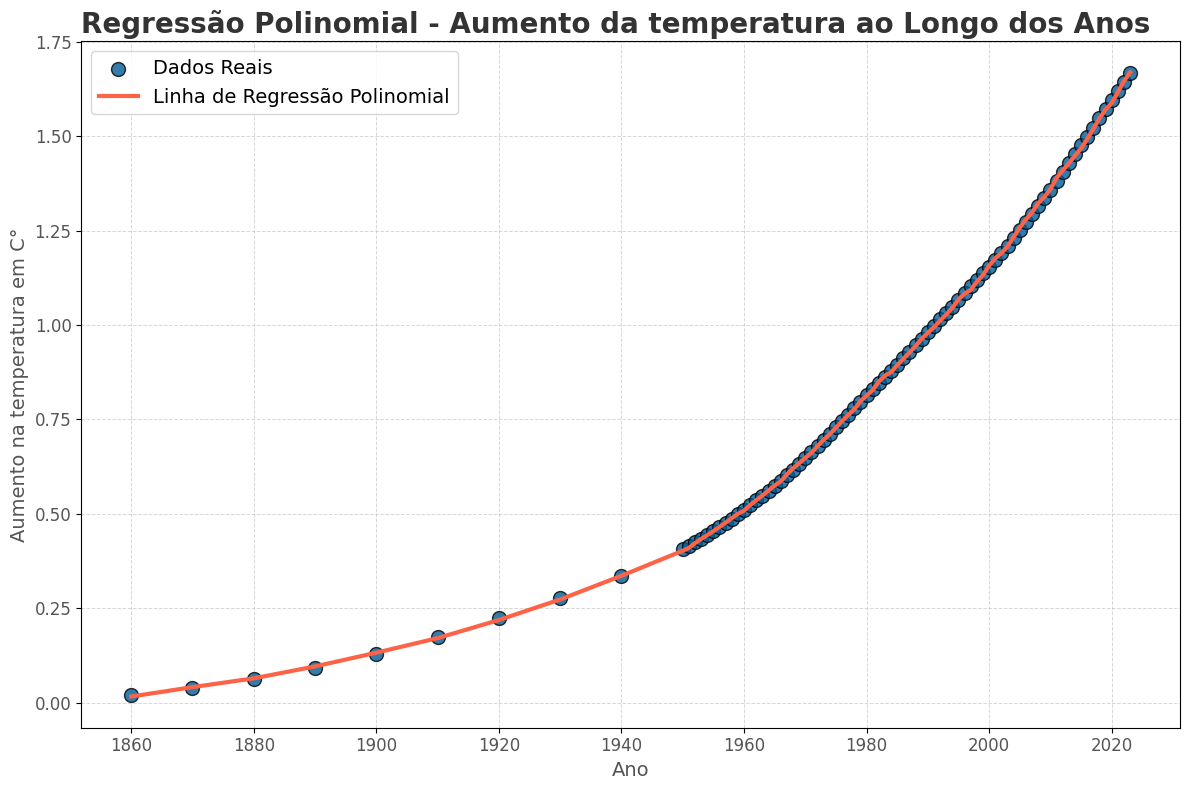

In [20]:
# @title
X_temp = df_aglutinado[['Year', 'Population','CO2 Emissions', 'CH4 Emissions', 'N2O Emissions']]  # Definindo X
y_temp = df_aglutinado['Change']         # Definindo Y

# Dividindo os dados em conjuntos de treinamento e teste
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_temp, y_temp, test_size=0.3, random_state=37)

# Regressão polinomial (opcional, se desejar usar um modelo mais sofisticado)
from sklearn.preprocessing import PolynomialFeatures # Importando PolynomialFeatures

poly = PolynomialFeatures(degree=2)  # Ajuste o grau conforme necessário
X_train_poly = poly.fit_transform(X_train_temp)
X_test_poly = poly.transform(X_test_temp)

model_temp = LinearRegression()
model_temp.fit(X_train_poly, y_train_temp)

# Fazendo previsões
y_pred_temp = model_temp.predict(X_test_poly)

# Previsões para o dataframe df_previsoes
df_previsoes['Change'] = model_temp.predict(poly.transform(df_previsoes[['Year', 'Population', 'CO2 Emissions', 'CH4 Emissions', 'N2O Emissions']]))


# Avaliando do modelo
mse = mean_squared_error(y_test_temp, y_pred_temp)
r2 = r2_score(y_test_temp, y_pred_temp)

print(f'Erro Quadrático Médio (MSE): {mse:.2f}')
print(f'Coeficiente de Determinação (R²): {r2:.2f}')

# Criando o gráfico
plt.figure(figsize=(12, 8))
plt.scatter(X_temp['Year'], y_temp, color='#005B96', s=100, label='Dados Reais', zorder=5, edgecolors='black', alpha=0.8)  # Pontos com borda preta e alpha
# Applying the same PolynomialFeatures transformation to X_temp before prediction
plt.plot(X_temp['Year'], model_temp.predict(poly.transform(X_temp)), color='#FF6347', lw=3, label='Linha de Regressão Polinomial', linestyle='-', zorder=10)  # Linha de regressão vermelha

# Ajustes de título, rótulos e legenda
plt.title('Regressão Polinomial - Aumento da temperatura ao Longo dos Anos', fontsize=20, color='#333333', weight='bold', loc='left')
plt.xlabel('Ano', fontsize=14, color='#555555')
plt.ylabel('Aumento na temperatura em C°', fontsize=14, color='#555555')

# Personalizando as fontes e estilo dos rótulos
plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')

# Melhorando a legenda
plt.legend(loc='upper left', fontsize=14, fancybox=True, framealpha=0.8)

# Adicionando uma grade suave
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.5)

# Ajuste final de margens
plt.tight_layout()

# Exibindo o gráfico
plt.show()

## **Aplicando modelo para prever valores ate 2150**

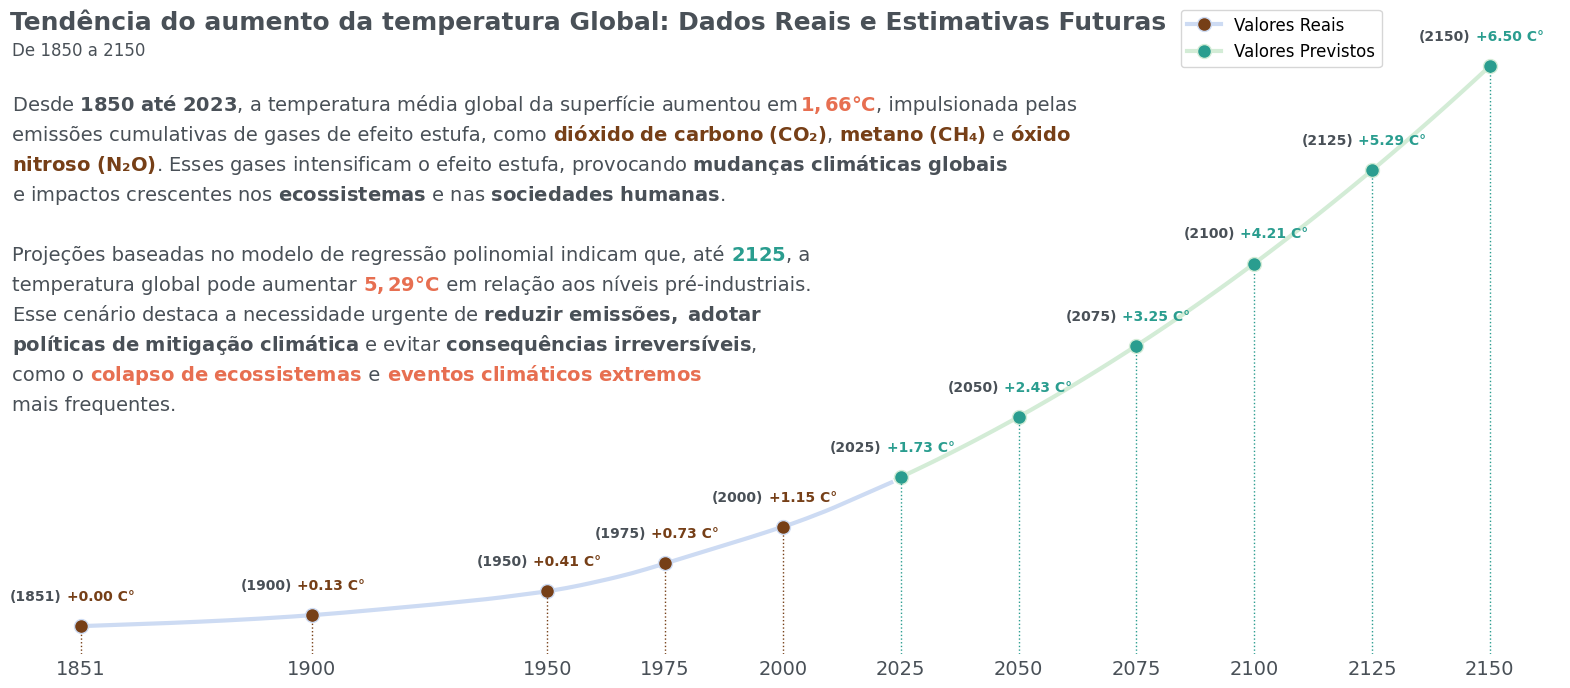

In [50]:
# @title
df_previsoes['Change'] = model_temp.predict(poly.transform(df_previsoes[['Year', 'Population', 'CO2 Emissions', 'CH4 Emissions', 'N2O Emissions']]))

fig, ax = plt.subplots(figsize=(20, 8))

# Criando uma lista de booleanos para destacar os anos que são múltiplos de 25 ou o ano 2023
pontos_a_marcar = [(Ano != 1875 and Ano != 1925 and Ano != 1850 and Ano % 25 == 0 or Ano == 1851) for Ano in df_temp['Year']]
pontos_a_marcar_futuro = [(Ano % 25 == 0) for Ano in df_previsoes['Year']]

# Plotando o gráfico de linha com pontos destacados
real, = ax.plot(df_temp['Year'], df_temp['Change'], lw=3, color=AZUL5, marker='o',
                markersize=10, markerfacecolor=MARROM1, markevery=pontos_a_marcar, label='Valores Reais')
previsto, = ax.plot(df_previsoes['Year'], df_previsoes['Change'], lw=3, color=VERDE3, marker='o',
                    markersize=10, markerfacecolor=VERDE2, markevery=pontos_a_marcar_futuro, label='Valores Previstos')

# Configurando a legenda
ax.legend(handles=[real, previsto], fontsize=12, loc='upper center', bbox_to_anchor=(0.82, 1.06), frameon=True)

# Configurações de título e rótulos
ax.set_title('Tendência do aumento da temperatura Global: Dados Reais e Estimativas Futuras', fontsize=18, color=CINZA2, loc='left', weight='bold')
ax.text(0.087, 0.98, 'De 1850 a 2150', transform=ax.transAxes, fontsize=12, color=CINZA2, ha='right', va='center')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.set_frame_on(False)
ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)

# Removendo todos os ticks do eixo x e y
ax.tick_params(axis='both', which='both', length=0)

# Adicionando os ticks no eixo X, incluindo os anos adicionais
anos_xticks = [1851, 1900, 1950, 1975, 2000, 2025, 2050, 2075, 2100, 2125, 2150]
ax.set_xticks(anos_xticks)

# Adicionando as anotações para os pontos a cada 25 anos
for i, (year, temp) in enumerate(zip(df_temp['Year'], df_temp['Change'])):
    if year != 1875 and year != 1925 and year !=1850 and year % 25 == 0 or year == 1851:
      ax.text(x=year-3,          # Ajuste horizontal
              y=temp + 0.3,  # Ajuste vertical para evitar sobreposição
              s=f"+{temp:.2f} C°",
              color=MARROM1, weight="bold", fontsize=10)
      ax.text(x=year - 15,       # Ajuste horizontal
              y=temp + 0.3,  # Ajuste vertical para evitar sobreposição
              s=f"({year})",
              color=CINZA2, weight="bold", fontsize=10)

for i, (year, temp) in enumerate(zip(df_previsoes['Year'], df_previsoes['Change'])):
    if year % 25 == 0:
      ax.text(x=year-3,          # Ajuste horizontal
              y=temp + 0.3,  # Ajuste vertical para evitar sobreposição
              s=f"+{temp:.2f} C°",
              color=VERDE2, weight="bold", fontsize=10)
      ax.text(x=year - 15,       # Ajuste horizontal
              y=temp + 0.3,  # Ajuste vertical para evitar sobreposição
              s=f"({year})",
              color=CINZA2, weight="bold", fontsize=10)

#Adicionando linha nos anos
ax.axvline(x= 1.851e3, ymin= 0, ymax= 0.05, color=MARROM1, linewidth=1, linestyle=':')
ax.axvline(x= 1.9e3, ymin= 0, ymax= 0.07, color=MARROM1, linewidth=1, linestyle=':')
ax.axvline(x= 1.95e3, ymin= 0, ymax= 0.1, color=MARROM1, linewidth=1, linestyle=':')
ax.axvline(x= 1.975e3, ymin= 0, ymax= 0.15, color=MARROM1, linewidth=1, linestyle=':')
ax.axvline(x= 2e3, ymin= 0, ymax= 0.2, color=MARROM1, linewidth=1, linestyle=':')

ax.axvline(x= 2.025e3, ymin= 0, ymax= 0.28, color=VERDE2, linewidth=1, linestyle=':')
ax.axvline(x= 2.05e3, ymin= 0, ymax= 0.38, color=VERDE2, linewidth=1, linestyle=':')
ax.axvline(x= 2.075e3, ymin= 0, ymax= 0.5, color=VERDE2, linewidth=1, linestyle=':')
ax.axvline(x= 2.1e3, ymin= 0, ymax= 0.62, color=VERDE2, linewidth=1, linestyle=':')
ax.axvline(x= 2.125e3, ymin= 0, ymax= 0.79, color=VERDE2, linewidth=1, linestyle=':')
ax.axvline(x= 2.15e3, ymin= 0, ymax= 0.95, color=VERDE2, linewidth=1, linestyle=':')

texto_colorido(
    1836.5, 2.5,
    'Desde $\\bf{1850\ até\ 2023}$, a temperatura média global da superfície aumentou em ||$\\bf{1,66°C}$||, impulsionada pelas\n'
    'emissões cumulativas de gases de efeito estufa, como ||$\\bf{dióxido\ de\ carbono\ (CO₂)}$||,|| $\\bf{metano\ (CH₄)}$|| e ||$\\bf{óxido}$ \n'
    '$\\bf{nitroso\ (N₂O)}$||. Esses gases intensificam o efeito estufa, provocando $\\bf{mudanças\ climáticas\ globais}$\n'
    'e impactos crescentes nos $\\bf{ecossistemas}$ e nas $\\bf{sociedades\ humanas}$.\n'
    '\n'
    'Projeções baseadas no modelo de regressão polinomial indicam que, até|| $\\bf{2125}$||, a\n'
    'temperatura global pode aumentar ||$\\bf{5,29°C}$|| em relação aos níveis pré-industriais.\n'
    'Esse cenário destaca a necessidade urgente de $\\bf{reduzir\ emissões,\ adotar}$\n'
    '$\\bf{políticas\ de\ mitigação\ climática}$ e evitar $\\bf{consequências\ irreversíveis}$,\n'
    'como o ||$\\bf{colapso\ de\ ecossistemas}$|| e ||$\\bf{eventos\ climáticos\ extremos}$\n'
    'mais frequentes.',
    [
        [CINZA2, VERMELHO1, CINZA2],
        [CINZA2, MARROM1, CINZA2, MARROM1, CINZA2, MARROM1],
        [MARROM1, CINZA2],
        [CINZA2],
        [CINZA2],
        [CINZA2, VERDE2, CINZA2],
        [CINZA2, VERMELHO1, CINZA2],
        [CINZA2],
        [CINZA2],
        [CINZA2, VERMELHO1, CINZA2, VERMELHO1],
        [CINZA2]
    ],
    esp=30,
    ax=ax,
    fontsize=14
)

plt.show()